### This is Owen Monroe's Notebook for IS 567 Text Mining for the Project Progress Report
This notebook evaluates NER models and tagging, comparing the spacy NER model to my own hand-annotated data. The text data comes from downloaded files from the Hathi-Trust Digital Library. These texts are 19th Century Magazines from the publishers, The Society for the Diffusion of Useful Knowledge, the William and Robert Chambers, and the Society for the Diffusion of General and Christian Knowledge among the Chinese. 

In [411]:
# Loading the Spacy Model

import spacy



In [412]:
nlp = spacy.load('en_core_web_sm')

In [413]:
def merge_iob_tokens(annotations):
    merged_annotations = []
    current_entity = None
    current_tokens = []

    for token, label in annotations:
        iob_prefix, entity = label.split('-')
        
        if iob_prefix == 'B':
            # Start a new entity
            if current_entity:
                merged_annotations.append((' '.join(current_tokens), current_entity))
            current_entity = entity
            current_tokens = [token]
        elif iob_prefix == 'I':
            # Continue the current entity
            if current_entity == entity:
                current_tokens.append(token)
            else:
                # Start a new entity if the entity type changes
                if current_entity:
                    merged_annotations.append((' '.join(current_tokens), current_entity))
                current_entity = entity
                current_tokens = [token]

    # Append the last entity if any
    if current_entity:
        merged_annotations.append((' '.join(current_tokens), current_entity))

    return merged_annotations

## Document 1 Comparison: Clipping from Chambers's Information for the People 1835 (on France)


In [414]:
hand_annotated_data_1 = []
with open("Useful_Knowledge_Annotations_iob_3/DOCUMENT-omonroe2_illinois_edu/Chambers_InfoForPeople_France_1835.txt.tsv", "r", encoding="utf-8") as iob_file_1:
    for line in iob_file_1:
        line = line.strip()
        if line:
            token, label = line.split("\t")
           
            hand_annotated_data_1.append((token, label))

hand_annotated_tagged_1 = [(token, label) for token, label in hand_annotated_data_1 if label != 'O']

merged_hand_annotations_1 = merge_iob_tokens(hand_annotated_tagged_1)

print(f'Hand Annotations List number = {len(merged_hand_annotations_1)}')
merged_hand_annotations_1


Hand Annotations List number = 361


[('France', 'GPE'),
 ('1', 'CARDINAL'),
 ('4500', 'QUANTITY'),
 ('Jura mountains', 'LOC'),
 ('0000', 'QUANTITY'),
 ('Daaphlny', 'GPE'),
 ('Provence', 'GPE'),
 ('mountains of Auvergne', 'LOC'),
 ('Puy de Dome', 'LOC'),
 ("Moots d'Or", 'LOC'),
 ('Mont Lozcre', 'LOC'),
 ('510', 'QUANTITY'),
 ('Pyrenees', 'LOC'),
 ('France', 'GPE'),
 ('Spain', 'GPE'),
 ('Rhine', 'LOC'),
 ('Seine', 'LOC'),
 ('Loire', 'LOC'),
 ('Garonne', 'LOC'),
 ('Adour', 'LOC'),
 ('Pyrenees', 'LOC'),
 ('Bayonne', 'LOC'),
 ('Marne', 'LOC'),
 ('Oise', 'LOC'),
 ('Seine', 'LOC'),
 ('Loire', 'LOC'),
 ('Sarthe', 'LOC'),
 ('Maycnne', 'LOC'),
 ('Loire', 'LOC'),
 ('Rhone', 'LOC'),
 ('Saoue', 'LOC'),
 ('Isire', 'LOC'),
 ('Durance', 'LOC'),
 ('Ain', 'LOC'),
 ('Sorgue', 'LOC'),
 ('Tarn', 'LOC'),
 ('Dordi', 'LOC'),
 ('Garonne', 'LOC'),
 ('canals', 'FAC'),
 ('France', 'GPE'),
 ('Flanders', 'GPE'),
 ('Artuis', 'GPE'),
 ('Picardy', 'GPE'),
 ('Normandy', 'GPE'),
 ('Isle of France', 'GPE'),
 ('18 , I 70,51 > 0', 'QUANTITY'),
 ('Ga - ronne'

In [415]:
with open("Useful_Knowledge_Texts/Clipped_Texts/Chambers_InfoForPeople_France_1835.txt", "r", encoding="utf-8") as text_file:
    text = text_file.read()

In [416]:
doc = nlp(text)

In [417]:
spacy_annotations = [(ent.text, ent.label_) for ent in doc.ents]

In [418]:
print(f'Spacy Annotations List number = {len(spacy_annotations)}')
spacy_annotations


Spacy Annotations List number = 294


[('France', 'GPE'),
 ('1', 'CARDINAL'),
 ('The \n Toeget', 'ORG'),
 ('2', 'CARDINAL'),
 ('0000 \n feet', 'QUANTITY'),
 ('3', 'CARDINAL'),
 ('Alpine', 'ORG'),
 ('Daaphlny \n ', 'ORG'),
 ('Provence', 'GPE'),
 ('4', 'CARDINAL'),
 ('Auvergne', 'GPE'),
 ('the Puy de Dome', 'FAC'),
 ('the \n Cental', 'ORG'),
 ('5', 'CARDINAL'),
 ('0', 'CARDINAL'),
 ('France', 'GPE'),
 ('Spain', 'GPE'),
 ('four', 'CARDINAL'),
 ('Rhine', 'GPE'),
 ('Seine', 'PERSON'),
 ('Loire', 'ORG'),
 ('the \n Garonne', 'LOC'),
 ('Marne', 'PERSON'),
 ('Oise', 'PERSON'),
 ('Seine', 'PERSON'),
 ('Loire', 'ORG'),
 ('Maycnne', 'PERSON'),
 ('Loire', 'ORG'),
 ('Rhone', 'ORG'),
 ('Saoue', 'ORG'),
 ('Durance', 'ORG'),
 ('Ain', 'PERSON'),
 ('Garonne', 'LOC'),
 ('France', 'GPE'),
 ('Normandy', 'PERSON'),
 ('the Isle \n of', 'ORG'),
 ('France', 'GPE'),
 ('about \n 18,I70,51>0 acres', 'QUANTITY'),
 ('7)054,501 acres', 'QUANTITY'),
 ('Languedoc', 'ORG'),
 ('Limarne', 'PERSON'),
 ('Auvergne', 'GPE'),
 ('one', 'CARDINAL'),
 ('twenty feet',

In [419]:
ground_truth_set = set(merged_hand_annotations_1)
spacy_predictions_set = set(spacy_annotations)

true_positives = ground_truth_set.intersection(spacy_predictions_set)

num_true_positives = len(true_positives)
print('True Positives are when hand truth matches spacy predictions')
print(f"Number of True Positives: {num_true_positives}")
print()

for entity in true_positives:
    print(f"True Positive: {entity}")

True Positives are when hand truth matches spacy predictions
Number of True Positives: 80

True Positive: ('Marie Therese', 'PERSON')
True Positive: ('1433', 'DATE')
True Positive: ('1574', 'DATE')
True Positive: ('France', 'GPE')
True Positive: ('Charles', 'PERSON')
True Positive: ('Provence', 'GPE')
True Positive: ('1580', 'DATE')
True Positive: ('1834', 'DATE')
True Positive: ('1814', 'DATE')
True Positive: ('1350', 'DATE')
True Positive: ('454,801,000 francs', 'MONEY')
True Positive: ('11113', 'DATE')
True Positive: ('Dupin', 'PERSON')
True Positive: ('Louis XVU', 'PERSON')
True Positive: ('1830', 'DATE')
True Positive: ('Louis Philip', 'PERSON')
True Positive: ('Louis XVIIL', 'PERSON')
True Positive: ('233,770', 'CARDINAL')
True Positive: ('1380', 'DATE')
True Positive: ('305,000,000 francs', 'MONEY')
True Positive: ('Paris', 'GPE')
True Positive: ('John', 'PERSON')
True Positive: ('1547', 'DATE')
True Positive: ('1813', 'DATE')
True Positive: ('LoiHs XIV', 'PERSON')
True Positive

In [420]:
false_negatives = ground_truth_set.difference(spacy_predictions_set)

num_false_negatives = len(false_negatives)
print('False Negatives are present in hand truth but not spacy predictions')
print(f"Number of False Negatives: {num_false_negatives}")
print()

for entity in false_negatives:
    print(f"False Negative : {entity}")


False Negatives are present in hand truth but not spacy predictions
Number of False Negatives: 231

False Negative : ('sailors', 'NORP')
False Negative : ('l , 037 , iO 4,4 » l francs', 'MONEY')
False Negative : ('103,050,000', 'MONEY')
False Negative : ('181', 'DATE')
False Negative : ('steam . engines', 'FAC')
False Negative : ("Moots d'Or", 'LOC')
False Negative : ('poutoes', 'PRODUCT')
False Negative : ('Louis XIV', 'PERSON')
False Negative : ('Bordeaux', 'LOC')
False Negative : ('army', 'NORP')
False Negative : ('throne', 'NORP')
False Negative : ('French - man', 'NORP')
False Negative : ('sheep', 'PRODUCT')
False Negative : ('silk', 'PRODUCT')
False Negative : ('Philip IV . ( the Fair )', 'PERSON')
False Negative : ('mountains of Auvergne', 'LOC')
False Negative : ('1407', 'DATE')
False Negative : ('031', 'DATE')
False Negative : ('Louvain', 'PERSON')
False Negative : ('Tarn', 'LOC')
False Negative : ('wheat', 'PRODUCT')
False Negative : ('51,600,000', 'CARDINAL')
False Negative 

In [421]:
false_positives = spacy_predictions_set.difference(ground_truth_set)


num_false_positives = len(false_positives)
print('False Positives are predicted by spacy but are not in hand truth')
print(f"Number of False Positives: {num_false_positives}")
print()

for entity in false_positives:
    print(f"False Positive : {entity}")


False Positives are predicted by spacy but are not in hand truth
Number of False Positives: 166

False Positive : ('Charles IX.', 'PERSON')
False Positive : ('Jan. 24, 1778', 'DATE')
False Positive : ('Orleans', 'ORG')
False Positive : ('1H2A', 'CARDINAL')
False Positive : ('Seine', 'PERSON')
False Positive : ('Hugh Capet \n ', 'ORG')
False Positive : ('53,533,430', 'CARDINAL')
False Positive : ('103,050,000', 'CARDINAL')
False Positive : ('five', 'CARDINAL')
False Positive : ('Ain', 'PERSON')
False Positive : ('Daaphlny \n ', 'ORG')
False Positive : ('more than one-third', 'CARDINAL')
False Positive : ('01', 'CARDINAL')
False Positive : ('Marne', 'PERSON')
False Positive : ('the United States', 'GPE')
False Positive : ('Kept', 'ORG')
False Positive : ('Henry IIL', 'ORG')
False Positive : ('4^,000,000', 'CARDINAL')
False Positive : ('Champagne', 'ORG')
False Positive : ('144,58I,(MI4', 'CARDINAL')
False Positive : ('10,795,000 \n acres', 'QUANTITY')
False Positive : ('Bretagne', 'GPE')

In [422]:
rec_calc = num_true_positives / (num_true_positives + num_false_negatives)
prec_calc = num_true_positives / (num_true_positives + num_false_positives)
f1_calc = (2 * prec_calc * rec_calc) / (prec_calc + rec_calc)

print('Evaluation Calculation Reports')
print()
print(f'Recall Score = {rec_calc}')
print(f'Precision Score = {prec_calc}')
print(f'F1 Score = {f1_calc}')


Evaluation Calculation Reports

Recall Score = 0.2572347266881029
Precision Score = 0.3252032520325203
F1 Score = 0.28725314183123873


In [423]:
# Clipping Annotation Lists to Evaluate (?)

hand_subset = merged_hand_annotations_1[:290]
spacy_subset = spacy_annotations[:290]
spacy_subset

[('France', 'GPE'),
 ('1', 'CARDINAL'),
 ('The \n Toeget', 'ORG'),
 ('2', 'CARDINAL'),
 ('0000 \n feet', 'QUANTITY'),
 ('3', 'CARDINAL'),
 ('Alpine', 'ORG'),
 ('Daaphlny \n ', 'ORG'),
 ('Provence', 'GPE'),
 ('4', 'CARDINAL'),
 ('Auvergne', 'GPE'),
 ('the Puy de Dome', 'FAC'),
 ('the \n Cental', 'ORG'),
 ('5', 'CARDINAL'),
 ('0', 'CARDINAL'),
 ('France', 'GPE'),
 ('Spain', 'GPE'),
 ('four', 'CARDINAL'),
 ('Rhine', 'GPE'),
 ('Seine', 'PERSON'),
 ('Loire', 'ORG'),
 ('the \n Garonne', 'LOC'),
 ('Marne', 'PERSON'),
 ('Oise', 'PERSON'),
 ('Seine', 'PERSON'),
 ('Loire', 'ORG'),
 ('Maycnne', 'PERSON'),
 ('Loire', 'ORG'),
 ('Rhone', 'ORG'),
 ('Saoue', 'ORG'),
 ('Durance', 'ORG'),
 ('Ain', 'PERSON'),
 ('Garonne', 'LOC'),
 ('France', 'GPE'),
 ('Normandy', 'PERSON'),
 ('the Isle \n of', 'ORG'),
 ('France', 'GPE'),
 ('about \n 18,I70,51>0 acres', 'QUANTITY'),
 ('7)054,501 acres', 'QUANTITY'),
 ('Languedoc', 'ORG'),
 ('Limarne', 'PERSON'),
 ('Auvergne', 'GPE'),
 ('one', 'CARDINAL'),
 ('twenty feet',

In [424]:
hand_subset

[('France', 'GPE'),
 ('1', 'CARDINAL'),
 ('4500', 'QUANTITY'),
 ('Jura mountains', 'LOC'),
 ('0000', 'QUANTITY'),
 ('Daaphlny', 'GPE'),
 ('Provence', 'GPE'),
 ('mountains of Auvergne', 'LOC'),
 ('Puy de Dome', 'LOC'),
 ("Moots d'Or", 'LOC'),
 ('Mont Lozcre', 'LOC'),
 ('510', 'QUANTITY'),
 ('Pyrenees', 'LOC'),
 ('France', 'GPE'),
 ('Spain', 'GPE'),
 ('Rhine', 'LOC'),
 ('Seine', 'LOC'),
 ('Loire', 'LOC'),
 ('Garonne', 'LOC'),
 ('Adour', 'LOC'),
 ('Pyrenees', 'LOC'),
 ('Bayonne', 'LOC'),
 ('Marne', 'LOC'),
 ('Oise', 'LOC'),
 ('Seine', 'LOC'),
 ('Loire', 'LOC'),
 ('Sarthe', 'LOC'),
 ('Maycnne', 'LOC'),
 ('Loire', 'LOC'),
 ('Rhone', 'LOC'),
 ('Saoue', 'LOC'),
 ('Isire', 'LOC'),
 ('Durance', 'LOC'),
 ('Ain', 'LOC'),
 ('Sorgue', 'LOC'),
 ('Tarn', 'LOC'),
 ('Dordi', 'LOC'),
 ('Garonne', 'LOC'),
 ('canals', 'FAC'),
 ('France', 'GPE'),
 ('Flanders', 'GPE'),
 ('Artuis', 'GPE'),
 ('Picardy', 'GPE'),
 ('Normandy', 'GPE'),
 ('Isle of France', 'GPE'),
 ('18 , I 70,51 > 0', 'QUANTITY'),
 ('Ga - ronne'

In [425]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_true = [label for token, label in hand_subset]
y_pred = [label for token, label in spacy_subset]

prec_score_micro = precision_score(y_true, y_pred, average='micro')
prec_score_weighted = precision_score(y_true, y_pred, average='weighted')

rec_score_micro = recall_score(y_true, y_pred, average='micro')
rec_score_weighted = recall_score(y_true, y_pred, average='weighted')

f1_score_micro = f1_score(y_true, y_pred, average='micro')
f1_score_weighted = f1_score(y_true, y_pred, average='weighted')



print("EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS")
print()
print(f'Micro PRECISION score for subsets = {prec_score_micro}')
print(f'Weighted PRECISION score for subsets = {prec_score_weighted}')
print()
print(f'Micro RECALL score for subsets = {rec_score_micro}')
print(f'Weighted RECALL score for subsets = {rec_score_weighted}')
print()
print(f'Micro F1 score for subsets = {f1_score_micro}')
print(f'Weighted F1 score for subsets = {f1_score_weighted}')
print()

EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS

Micro PRECISION score for subsets = 0.15517241379310345
Weighted PRECISION score for subsets = 0.21866013492073413

Micro RECALL score for subsets = 0.15517241379310345
Weighted RECALL score for subsets = 0.15517241379310345

Micro F1 score for subsets = 0.15517241379310345
Weighted F1 score for subsets = 0.13238423332513974



/Users/owenmonroe/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/owenmonroe/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


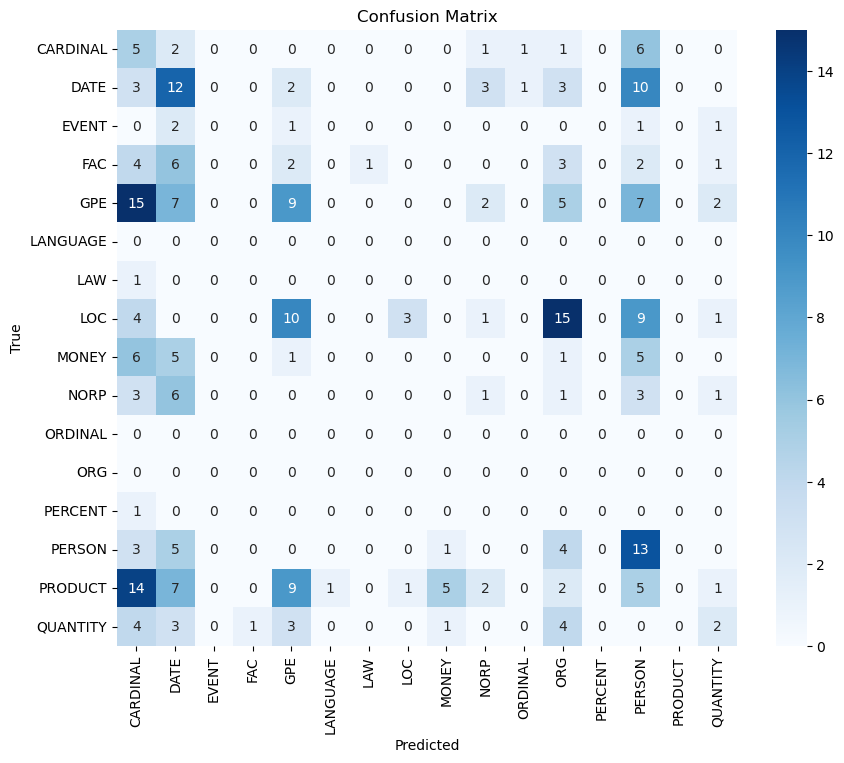

In [426]:
from sklearn.metrics import confusion_matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



labels = sorted(list(set(y_true + y_pred)))


conf_matrix = confusion_matrix(y_true, y_pred, labels=labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Document 2 Comparison: Clipping from Chambers's Journal 1839 (on Literature)


In [427]:
# Loading and Cleaning Hand Annotations

hand_annotated_data_2 = []
with open("Useful_Knowledge_Annotations_iob_3/DOCUMENT-omonroe2_illinois_edu/Chambers_Journal_literature_Jan26_1839.txt.tsv", "r", encoding="utf-8") as iob_file_2:
    for line in iob_file_2:
        line = line.strip()
        if line:
            token, label = line.split("\t")
           
            hand_annotated_data_2.append((token, label))

hand_annotated_tagged_2 = [(token, label) for token, label in hand_annotated_data_2 if label != 'O']

merged_hand_annotations_2 = merge_iob_tokens(hand_annotated_tagged_2)

print(f'Hand Annotations List number = {len(merged_hand_annotations_2)}')
merged_hand_annotations_2

Hand Annotations List number = 187


[('EDINBURGIT', 'GPE'),
 ('CHAMBERS', 'PERSON'),
 ('WILLIAM', 'PERSON'),
 ('ROBERT CHAMBERS', 'PERSON'),
 ('CHAMBERS', 'PERSON'),
 ('BRADBURY', 'PERSON'),
 ('EVANS', 'PERSON'),
 ('WHITEFRIARS', 'GPE'),
 ('SATURDAY , JANUARY 26 , 1839', 'DATE'),
 ('THREE HALFPENSE', 'MONEY'),
 ('meat', 'PRODUCT'),
 ('Crusoe', 'WORK_OF_ART'),
 ('Gulliver', 'WORK_OF_ART'),
 ('Waverley Novels', 'WORK_OF_ART'),
 ('Fielding', 'PERSON'),
 ('Smollett', 'PERSON'),
 ('Parson Adams', 'PERSON'),
 ('Lilliputians', 'ORG'),
 ('Lilliput', 'GPE'),
 ('1728', 'DATE'),
 ('Lulliputians', 'ORG'),
 ('Mr Gulliver', 'PERSON'),
 ('1728', 'DATE'),
 ('Caleb Balderstone', 'PERSON'),
 ('Dalgetty', 'PERSON'),
 ('Dominie Sampson', 'PERSON'),
 ('the novel', 'WORK_OF_ART'),
 ('Loch Katrine', 'LOC'),
 ('Fitzjames', 'PERSON'),
 ('Laputa', 'PERSON'),
 ('Rarenswood', 'LOC'),
 ('Houynhymms', 'ORG'),
 ('satires', 'WORK_OF_ART'),
 ('Partridge', 'LOC'),
 ('book', 'PRODUCT'),
 ('fiction', 'WORK_OF_ART'),
 ("Arabian Nights ' Entertainments", 'WO

In [428]:
# Loading Document 2
with open('Useful_Knowledge_Texts/Clipped_Texts/Chambers_Journal_literature_Jan26_1839.txt', "r", encoding="utf-8") as text_file_2:
    text_2 = text_file_2.read()

In [429]:
# Spacy Tagging Text
doc_2 = nlp(text_2)

In [430]:
spacy_annotations_2 = [(ent.text, ent.label_) for ent in doc_2.ents]

print(f'Spacy Annotations List number = {len(spacy_annotations_2)}')
spacy_annotations_2

Spacy Annotations List number = 203


[('#', 'MONEY'),
 ('1', 'CARDINAL'),
 ('17', 'MONEY'),
 ('###############################################', 'MONEY'),
 ('JO\n', 'PERSON'),
 ('ROBERT CHAMBERS', 'PERSON'),
 ('EVANS', 'PERSON'),
 ('WHITEFRIARS', 'GPE'),
 ('LONDON', 'GPE'),
 ('365', 'CARDINAL'),
 ('SATURDAY', 'DATE'),
 ('JANUARY 26, 1839', 'DATE'),
 ('THREE', 'CARDINAL'),
 ('US', 'GPE'),
 ('first', 'ORDINAL'),
 ('Crusoe', 'ORG'),
 ('Gulliver', 'PERSON'),
 ('Fielding', 'ORG'),
 ('Smollett', 'PERSON'),
 ('Parson Adams', 'PERSON'),
 ('a few years ago', 'DATE'),
 ('Lilliputians', 'NORP'),
 ('Brobdignagians', 'NORP'),
 ('Lilliput', 'FAC'),
 ('Lulliputians', 'NORP'),
 ('twenty-five years', 'DATE'),
 ('Blunder', 'ORG'),
 ('only inches', 'QUANTITY'),
 ('one', 'CARDINAL'),
 ('two', 'CARDINAL'),
 ('12', 'CARDINAL'),
 ('1728', 'DATE'),
 ('Caleb Balderstone', 'PERSON'),
 ('Dugald', 'PERSON'),
 ('Andrews', 'PERSON'),
 ('Dominie Sampson', 'PERSON'),
 ('Scott', 'ORG'),
 ('Stirling\n', 'ORG'),
 ('Loch Katrine', 'PERSON'),
 ('Fitzjames', 

Doc 2 (Chambers 1839) EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS

Micro PRECISION score for subsets = 0.20555555555555555
Weighted PRECISION score for subsets = 0.2571405814416567

Micro RECALL score for subsets = 0.20555555555555555
Weighted RECALL score for subsets = 0.20555555555555555

Micro F1 score for subsets = 0.20555555555555555
Weighted F1 score for subsets = 0.22731883043247858



/Users/owenmonroe/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/owenmonroe/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


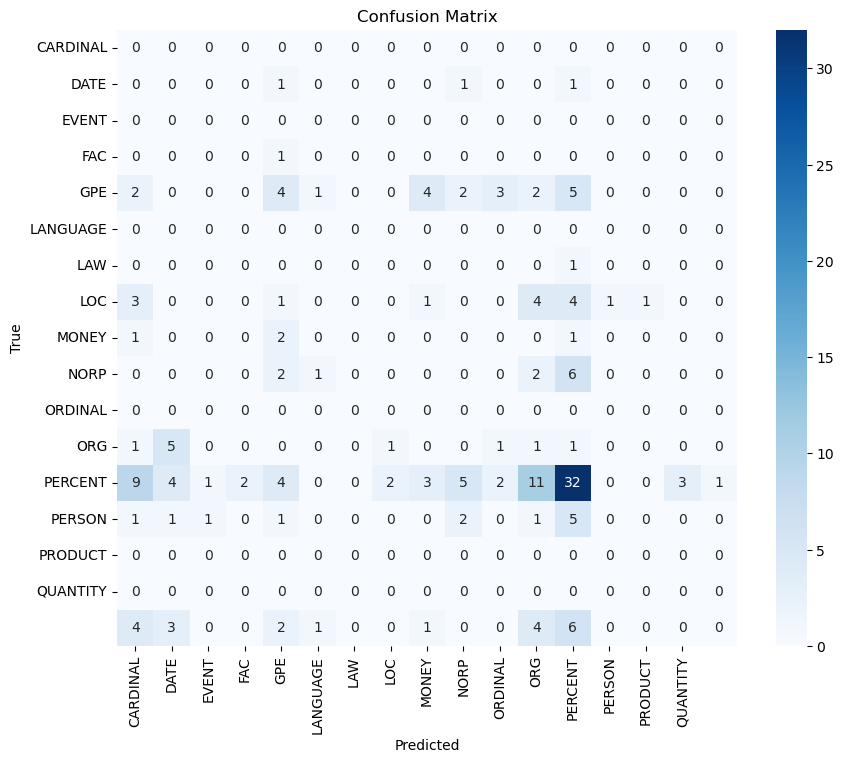

In [431]:
# Subsetting to Evaluate with Classification Reports and a Confusion matrix 

hand_subset_2 = merged_hand_annotations_2[:180]
spacy_subset_2 = spacy_annotations_2[:180]

y_true_2 = [label for token, label in hand_subset_2]
y_pred_2 = [label for token, label in spacy_subset_2]

prec_score_micro_2 = precision_score(y_true_2, y_pred_2, average='micro')
prec_score_weighted_2 = precision_score(y_true_2, y_pred_2, average='weighted')

rec_score_micro_2 = recall_score(y_true_2, y_pred_2, average='micro')
rec_score_weighted_2 = recall_score(y_true_2, y_pred_2, average='weighted')

f1_score_micro_2 = f1_score(y_true_2, y_pred_2, average='micro')
f1_score_weighted_2 = f1_score(y_true_2, y_pred_2, average='weighted')



print("Doc 2 (Chambers 1839) EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS")
print()
print(f'Micro PRECISION score for subsets = {prec_score_micro_2}')
print(f'Weighted PRECISION score for subsets = {prec_score_weighted_2}')
print()
print(f'Micro RECALL score for subsets = {rec_score_micro_2}')
print(f'Weighted RECALL score for subsets = {rec_score_weighted_2}')
print()
print(f'Micro F1 score for subsets = {f1_score_micro_2}')
print(f'Weighted F1 score for subsets = {f1_score_weighted_2}')
print()


labels_2 = sorted(list(set(y_true_2 + y_pred_2)))

conf_matrix_2 = confusion_matrix(y_true_2, y_pred_2, labels=labels_2)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_2, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [432]:
# Evaluation Through Set Intersections and Differences 

ground_truth_set_2 = set(hand_annotated_clean_2)
spacy_predictions_set_2 = set(spacy_annotations_2)

true_positives_2 = ground_truth_set_2.intersection(spacy_predictions_set_2)

num_true_positives_2 = len(true_positives_2)
print('True Positives are when hand truth matches spacy predictions')
print(f"Number of True Positives: {num_true_positives_2}")
print()

for entity in true_positives_2:
    print(f"True Positive : {entity}")

True Positives are when hand truth matches spacy predictions
Number of True Positives: 37

True Positive : ('England', 'GPE')
True Positive : ('Herbert', 'PERSON')
True Positive : ('Plymouth', 'GPE')
True Positive : ('Fitzjames', 'PERSON')
True Positive : ('London', 'GPE')
True Positive : ('Eloisa', 'LOC')
True Positive : ('Smollett', 'PERSON')
True Positive : ('Dryden', 'PERSON')
True Positive : ('Hamilton', 'PERSON')
True Positive : ('France', 'GPE')
True Positive : ('Milton', 'PERSON')
True Positive : ('WHITEFRIARS', 'GPE')
True Positive : ('EVANS', 'PERSON')
True Positive : ('Eugeniuses', 'PERSON')
True Positive : ('French', 'NORP')
True Positive : ('Italian', 'NORP')
True Positive : ('Tabitha', 'PERSON')
True Positive : ('Johnson', 'PERSON')
True Positive : ('SATURDAY', 'DATE')
True Positive : ('Spenser', 'PERSON')
True Positive : ('Gulliver', 'PERSON')
True Positive : ('Hudibras', 'PERSON')
True Positive : ('Pacific', 'LOC')
True Positive : ('Pallet', 'PERSON')
True Positive : ('

In [433]:
false_negatives_2 = ground_truth_set_2.difference(spacy_predictions_set_2)

num_false_negatives_2 = len(false_negatives_2)
print('False Negatvies are present in hand truth but not spacy predictions')
print(f"Number of False Negatives: {num_false_negatives_2}")
print()

for entity in false_negatives_2:
    print(f"False Negatives : {entity}")


False Negatvies are present in hand truth but not spacy predictions
Number of False Negatives: 179

False Negatives : ('poets', 'ORG')
False Negatives : ('Jonson', 'PERSON')
False Negatives : ('magnetic', 'LOC')
False Negatives : ('island', 'LOC')
False Negatives : ('literature', 'WORK_OF_ART')
False Negatives : ('Mrs', 'PERSON')
False Negatives : ('professors', 'ORG')
False Negatives : ('French', 'FAC')
False Negatives : ('Fanchon', 'PERSON')
False Negatives : ("Adam'st", 'PERSON')
False Negatives : ('EDINBURGIT', 'GPE')
False Negatives : ('Cowley', 'PERSON')
False Negatives : ('Emily', 'PERSON')
False Negatives : ('Dunbar', 'PERSON')
False Negatives : ('Man', 'WORK_OF_ART')
False Negatives : ('New', 'GPE')
False Negatives : ('Adams', 'PERSON')
False Negatives : ('Fielding', 'PERSON')
False Negatives : ('Loch', 'LOC')
False Negatives : ('Adam', 'WORK_OF_ART')
False Negatives : ('Wakefield', 'NORP')
False Negatives : ('of', 'NORP')
False Negatives : ('silver', 'MONEY')
False Negatives 

In [434]:
false_positives_2 = spacy_predictions_set_2.difference(ground_truth_set_2)


num_false_positives_2 = len(false_positives_2)
print('False Positives are predicted by spacy but are not in hand truth')
print(f"Number of False Positives: {num_false_positives_2}")
print()

for entity in false_positives_2:
    print(f"False Positive : {entity}")


False Positives are predicted by spacy but are not in hand truth
Number of False Positives: 125

False Positive : ('Andrews', 'PERSON')
False Positive : ('Thousands', 'CARDINAL')
False Positive : ('ten tedious years', 'DATE')
False Positive : ('Loch Katrine', 'PERSON')
False Positive : ('Plymouth', 'ORG')
False Positive : ('Dugald', 'PERSON')
False Positive : ('Ford', 'ORG')
False Positive : ('Carew', 'PERSON')
False Positive : ('Caleb Balderstone', 'PERSON')
False Positive : ('an hour', 'TIME')
False Positive : ('US', 'GPE')
False Positive : ('Parson Adams', 'PERSON')
False Positive : ('18', 'MONEY')
False Positive : ('Marsden', 'GPE')
False Positive : ('eight', 'CARDINAL')
False Positive : ('five minutes', 'TIME')
False Positive : ('Essay', 'PERSON')
False Positive : ('Rose', 'PERSON')
False Positive : ('Waller', 'ORG')
False Positive : ('Rembrandt', 'NORP')
False Positive : ('Miss Emily', 'PERSON')
False Positive : ('FRIEND', 'ORG')
False Positive : ('Panther', 'PERSON')
False Posit

In [435]:
rec_calc_2 = num_true_positives_2 / (num_true_positives_2 + num_false_negatives_2)
prec_calc_2 = num_true_positives_2 / (num_true_positives_2 + num_false_positives_2)
f1_calc_2 = (2 * prec_calc_2 * rec_calc_2) / (prec_calc_2 + rec_calc_2)

print('Evaluation Calculation Reports')
print()
print(f'Recall Score = {rec_calc_2}')
print(f'Precision Score = {prec_calc_2}')
print(f'F1 Score = {f1_calc_2}')


Evaluation Calculation Reports

Recall Score = 0.1712962962962963
Precision Score = 0.22839506172839505
F1 Score = 0.19576719576719578


## Document 3 Comparison: Clipping from Chambers's Journal 1851 (on Monasteries)

In [436]:

# Loading and Cleaning Hand Annotations

hand_annotated_data_3 = []
with open("Useful_Knowledge_Annotations_iob_3/DOCUMENT-omonroe2_illinois_edu/Chambers_Journal_monastery_1851.txt.tsv", "r", encoding="utf-8") as iob_file_3:
    for line in iob_file_3:
        line = line.strip()
        if line:
            token, label = line.split("\t")
           
            hand_annotated_data_3.append((token, label))

hand_annotated_tagged_3 = [(token, label) for token, label in hand_annotated_data_3 if label != 'O']

merged_hand_annotations_3 = merge_iob_tokens(hand_annotated_tagged_3)

print(f'Hand Annotations List number = {len(merged_hand_annotations_3)}')
merged_hand_annotations_3


Hand Annotations List number = 70


[('MONASTERY', 'FAC'),
 ('monks', 'NORP'),
 ('monkery', 'NORP'),
 ('Radcliffian era', 'DATE'),
 ('England', 'GPE'),
 ('Gate - house', 'LOC'),
 ('revolution', 'EVENT'),
 ('Guest - Hall', 'LOC'),
 ('Benedictine convent', 'LOC'),
 ('Ham', 'GPE'),
 ('Benedictines', 'NORP'),
 ('monastery of Mount St Bernard', 'NORP'),
 ('Leicestershire', 'GPE'),
 ('cattle', 'PRODUCT'),
 ('breeds', 'PRODUCT'),
 ('county', 'LOC'),
 ('place of abode', 'LOC'),
 ('English monas - tery', 'FAC'),
 ('rail', 'FAC'),
 ('abbey', 'FAC'),
 ('conventual horse', 'FAC'),
 ('monastery', 'FAC'),
 ('monastery of St Bernard', 'FAC'),
 ('vespers', 'TIME'),
 ('England', 'GPE'),
 ('county', 'LOC'),
 ('short horns', 'PRODUCT'),
 ('brethren in the choir', 'NORP'),
 ('Salve Regina', 'WORK_OF_ART'),
 ('picture of the Crucifixion', 'WORK_OF_ART'),
 ('cloisters', 'FAC'),
 ('church', 'FAC'),
 ('building', 'FAC'),
 ('the Salve Regina', 'WORK_OF_ART'),
 ('forty', 'QUANTITY'),
 ('monks', 'NORP'),
 ('altar', 'WORK_OF_ART'),
 ('church', 'FAC

In [437]:
# Loading Document 3
with open('Useful_Knowledge_Texts/Clipped_Texts/Chambers_Journal_monastery_1851.txt', "r", encoding="utf-8") as text_file_3:
    text_3 = text_file_3.read()

In [438]:
# spacy annotations for Document 3

doc_3 = nlp(text_3)
spacy_annotations_3 = [(ent.text, ent.label_) for ent in doc_3.ents]

print(f'Spacy Annotations List number = {len(spacy_annotations_3)}')
spacy_annotations_3

Spacy Annotations List number = 47


[('Radcliffian', 'NORP'),
 ('England', 'GPE'),
 ('Italian', 'NORP'),
 ('Spanish', 'NORP'),
 ('Gate', 'ORG'),
 ('French', 'NORP'),
 ('the Guest-Hall', 'ORG'),
 ('English', 'LANGUAGE'),
 ('Benedictine', 'ORG'),
 ('Ham', 'ORG'),
 ('Benedictines', 'NORP'),
 ('Fathers', 'ORG'),
 ('half', 'CARDINAL'),
 ('English', 'LANGUAGE'),
 ('six miles', 'QUANTITY'),
 ('Fathers', 'ORG'),
 ('Irishman', 'NORP'),
 ('Irishman', 'NORP'),
 ('evening', 'TIME'),
 ('St Bernard', 'PERSON'),
 ('evening', 'TIME'),
 ('Crucifixion', 'ORG'),
 ('the Salve Regina', 'GPE'),
 ('forty', 'CARDINAL'),
 ('#', 'MONEY'),
 ('338', 'CARDINAL'),
 ('350', 'MONEY'),
 ('############################################', 'MONEY'),
 ('338', 'CARDINAL'),
 ('EDINBURGH JOURNAL', 'ORG'),
 ('the night', 'TIME'),
 ('England', 'GPE'),
 ('first', 'ORDINAL'),
 ('the Confessional of the Black\nPenitents', 'ORG'),
 ('Montorio', 'PERSON'),
 ('the hour', 'TIME'),
 ('Montorio', 'PERSON'),
 ('two or three hours', 'TIME'),
 ('half-past', 'DATE'),
 ('one', 

Doc 3 (Chambers 1851 - Monasteries) EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS

Micro PRECISION score for subsets = 0.044444444444444446
Weighted PRECISION score for subsets = 0.050793650793650794

Micro RECALL score for subsets = 0.044444444444444446
Weighted RECALL score for subsets = 0.044444444444444446

Micro F1 score for subsets = 0.044444444444444446
Weighted F1 score for subsets = 0.047407407407407405



/Users/owenmonroe/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/owenmonroe/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


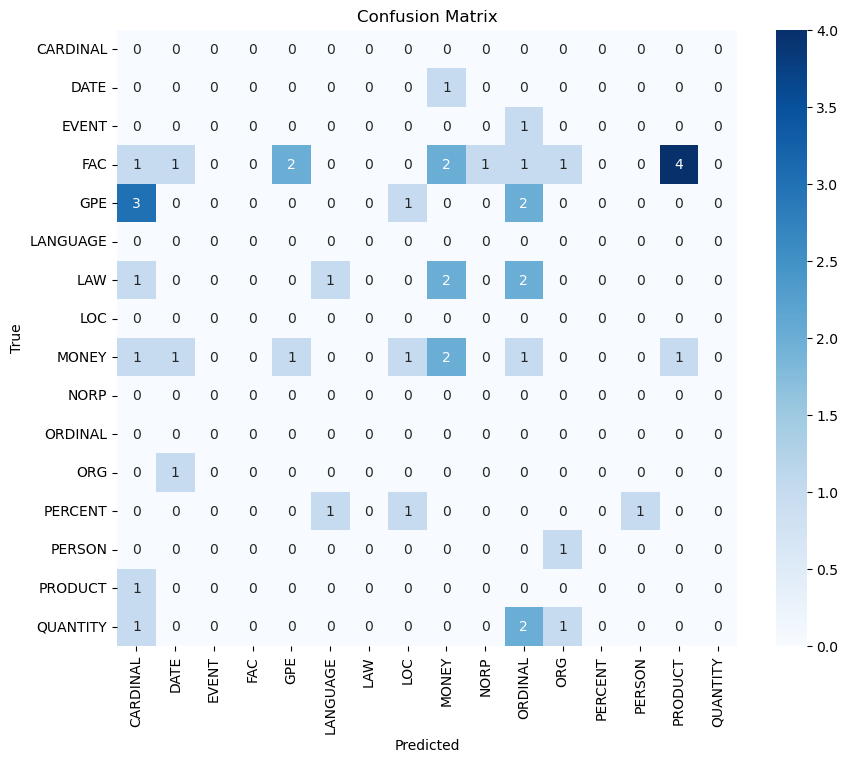

In [439]:
# Subsetting to Evaluate with Classification Reports and a Confusion matrix 

# Subsetting
hand_subset_3 = merged_hand_annotations_3[:45]
spacy_subset_3 = spacy_annotations_3[:45]

# Setting Ground Truth and Predictions
y_true_3 = [label for token, label in hand_subset_3]
y_pred_3 = [label for token, label in spacy_subset_3]

# Evaluation Reports
prec_score_micro_3 = precision_score(y_true_3, y_pred_3, average='micro')
prec_score_weighted_3 = precision_score(y_true_3, y_pred_3, average='weighted')

rec_score_micro_3 = recall_score(y_true_3, y_pred_3, average='micro')
rec_score_weighted_3 = recall_score(y_true_3, y_pred_3, average='weighted')

f1_score_micro_3 = f1_score(y_true_3, y_pred_3, average='micro')
f1_score_weighted_3 = f1_score(y_true_3, y_pred_3, average='weighted')


print("Doc 3 (Chambers 1851 - Monasteries) EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS")
print()
print(f'Micro PRECISION score for subsets = {prec_score_micro_3}')
print(f'Weighted PRECISION score for subsets = {prec_score_weighted_3}')
print()
print(f'Micro RECALL score for subsets = {rec_score_micro_3}')
print(f'Weighted RECALL score for subsets = {rec_score_weighted_3}')
print()
print(f'Micro F1 score for subsets = {f1_score_micro_3}')
print(f'Weighted F1 score for subsets = {f1_score_weighted_3}')
print()

# Confusion Matrix
labels_3 = sorted(list(set(y_true_3 + y_pred_3)))
conf_matrix_3 = confusion_matrix(y_true_3, y_pred_3, labels=labels_3)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_3, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [440]:
# Evaluation Through Set Intersections and Differences 

ground_truth_set_3 = set(hand_annotated_clean_3)
spacy_predictions_set_3 = set(spacy_annotations_3)

true_positives_3 = ground_truth_set_3.intersection(spacy_predictions_set_3)

num_true_positives_3 = len(true_positives_3)
print('True Positives are when hand truth matches spacy predictions')
print(f"Number of True Positives: {num_true_positives_3}")
print()

for entity in true_positives_3:
    print(f"True Positive : {entity}")

True Positives are when hand truth matches spacy predictions
Number of True Positives: 3

True Positive : ('England', 'GPE')
True Positive : ('Montorio', 'PERSON')
True Positive : ('Benedictines', 'NORP')


In [441]:
false_negatives_3 = ground_truth_set_3.difference(spacy_predictions_set_3)

num_false_negatives_3 = len(false_negatives_3)
print('False Negatives are present in hand truth but not spacy predictions')
print(f"Number of False Negatives: {num_false_negatives_3}")
print()

for entity in false_negatives_3:
    print(f"False Negatives : {entity}")

False Negatives are present in hand truth but not spacy predictions
Number of False Negatives: 78

False Negatives : ('-', 'TIME')
False Negatives : ('forty', 'QUANTITY')
False Negatives : ('church', 'FAC')
False Negatives : ('apartment', 'LOC')
False Negatives : ('eight', 'TIME')
False Negatives : ('era', 'DATE')
False Negatives : ('of', 'NORP')
False Negatives : ('land', 'LOC')
False Negatives : ('or', 'TIME')
False Negatives : ('hours', 'TIME')
False Negatives : ('Ham', 'GPE')
False Negatives : ('EDINBURGH', 'GPE')
False Negatives : ('English', 'FAC')
False Negatives : ('St', 'NORP')
False Negatives : ('-', 'FAC')
False Negatives : ('house', 'LOC')
False Negatives : ('MONASTERY', 'FAC')
False Negatives : ('Benedictine', 'LOC')
False Negatives : ('Guest', 'LOC')
False Negatives : ('monastery', 'NORP')
False Negatives : ('place', 'LOC')
False Negatives : ('cloisters', 'FAC')
False Negatives : ('-', 'LOC')
False Negatives : ('abbey', 'FAC')
False Negatives : ('Processionale', 'WORK_OF_

In [442]:
false_positives_3 = spacy_predictions_set_3.difference(ground_truth_set_3)

num_false_positives_3 = len(false_positives_3)
print('False Positives are predicted by spacy but are not in hand truth')
print(f"Number of False Positives: {num_false_positives_3}")
print()

for entity in false_positives_3:
    print(f"False Positive : {entity}")


False Positives are predicted by spacy but are not in hand truth
Number of False Positives: 36

False Positive : ('############################################', 'MONEY')
False Positive : ('#', 'MONEY')
False Positive : ('350', 'MONEY')
False Positive : ('half', 'CARDINAL')
False Positive : ('Fathers', 'ORG')
False Positive : ('half-past eight', 'DATE')
False Positive : ('EDINBURGH JOURNAL', 'ORG')
False Positive : ('one', 'CARDINAL')
False Positive : ('half-past', 'DATE')
False Positive : ('six miles', 'QUANTITY')
False Positive : ('the hour', 'TIME')
False Positive : ('festival-day', 'DATE')
False Positive : ('the Guest-Hall', 'ORG')
False Positive : ('Irishman', 'NORP')
False Positive : ('half-past seven', 'DATE')
False Positive : ('first', 'ORDINAL')
False Positive : ('English', 'LANGUAGE')
False Positive : ('the night', 'TIME')
False Positive : ('French', 'NORP')
False Positive : ('the Confessional of the Black\nPenitents', 'ORG')
False Positive : ('six', 'CARDINAL')
False Positiv

In [443]:
rec_calc_3 = num_true_positives_3 / (num_true_positives_3 + num_false_negatives_3)
prec_calc_3 = num_true_positives_3 / (num_true_positives_3 + num_false_positives_3)
f1_calc_3 = (2 * prec_calc_3 * rec_calc_3) / (prec_calc_3 + rec_calc_3)

print(f'Evaluation Calculation Reports for Document 3 Chambers Journal 1851')
print()
print(f'Recall Score = {rec_calc_3}')
print(f'Precision Score = {prec_calc_3}')
print(f'F1 Score = {f1_calc_3}')


Evaluation Calculation Reports for Document 3 Chambers Journal 1851

Recall Score = 0.037037037037037035
Precision Score = 0.07692307692307693
F1 Score = 0.05


## Document 4 Comparison: Clipping from Chambers's Journal 1872 (on Sorrow)

In [444]:
hand_annotated_data_4 = []
with open("Useful_Knowledge_Annotations_iob_3/DOCUMENT-omonroe2_illinois_edu/Chambers_Journal_sorrow_Jan6_1872.txt.tsv", "r", encoding="utf-8") as iob_file_4:
    for line in iob_file_4:
        line = line.strip()
        if line:
            token, label = line.split("\t")
           
            hand_annotated_data_4.append((token, label))

hand_annotated_tagged_4 = [(token, label) for token, label in hand_annotated_data_4 if label != 'O']

merged_hand_annotations_4 = merge_iob_tokens(hand_annotated_tagged_4)

print(f'Hand Annotations List number = {len(merged_hand_annotations_4)}')
merged_hand_annotations_4 

Hand Annotations List number = 82


[('CHAMBERS', 'PERSON'),
 ('WILLIAM', 'PERSON'),
 ('ROBERT', 'PERSON'),
 ('419', 'CARDINAL'),
 ('SATURDAY , JANUARY 6 , 1872', 'DATE'),
 ('CHAMBERS', 'PERSON'),
 ('MIRIAM CLINT', 'PERSON'),
 ('Miriam Clint', 'PERSON'),
 ('Miriam', 'PERSON'),
 ('school', 'FAC'),
 ('eight years', 'QUANTITY'),
 ('A HOUSE OF CARDS', 'WORK_OF_ART'),
 ('Miriam', 'PERSON'),
 ("Miss Monitor 's school", 'FAC'),
 ('Cres - cent House', 'LOC'),
 ('Hampstead', 'GPE'),
 ('Mr Clint', 'PERSON'),
 ('Miriam', 'PERSON'),
 ('Miriam', 'PERSON'),
 ('Mr Clint', 'PERSON'),
 ('11 d', 'MONEY'),
 ('Shakspeare', 'PERSON'),
 ('Mr Clint', 'PERSON'),
 ('Miriam', 'PERSON'),
 ('Crescent House', 'LOC'),
 ('Miss Monitor', 'PERSON'),
 ('Miss Monitor', 'PERSON'),
 ('Miriam', 'PERSON'),
 ('Miss Monitor', 'PERSON'),
 ('Miriam', 'PERSON'),
 ('Miriam', 'PERSON'),
 ('3 d June 18', 'DATE'),
 ('Dr Miriam', 'PERSON'),
 ('CHAMBERS', 'PERSON'),
 ('6th', 'DATE'),
 ('Crest House', 'LOC'),
 ('the hours of 12 and 4', 'TIME'),
 ('Miss M', 'PERSON'),
 ('

In [445]:
# Loading Document 4
with open('Useful_Knowledge_Texts/Clipped_Texts/Chambers_Journal_sorrow_Jan6_1872.txt', "r", encoding="utf-8") as text_file_4:
    text_4 = text_file_4.read()

In [446]:
# spacy annotations for Document 4
doc_4 = nlp(text_4)
spacy_annotations_4 = [(ent.text, ent.label_) for ent in doc_4.ents]

print(f'Spacy Annotations List number = {len(spacy_annotations_4)}')
spacy_annotations_4

Spacy Annotations List number = 83


[('#', 'MONEY'),
 ('1', 'CARDINAL'),
 ('11', 'MONEY'),
 ('###############################################', 'MONEY'),
 ("CHAMBERS'S JOURNAL\nLITERATURE", 'ORG'),
 ('ART', 'PRODUCT'),
 ('419', 'CARDINAL'),
 ('SATURDAY', 'DATE'),
 ('JANUARY 6, 1872', 'DATE'),
 ('eighteen years old', 'DATE'),
 ('Miriam Clint', 'PERSON'),
 ('Miriam', 'PERSON'),
 ('eight years', 'DATE'),
 ('House', 'ORG'),
 ('Hampstead', 'ORG'),
 ('Clint', 'PERSON'),
 ('Miriam', 'PERSON'),
 ('Miriam', 'PERSON'),
 ('11d', 'DATE'),
 ('Clint', 'PERSON'),
 ('within\nthree days', 'DATE'),
 ('Miriam', 'PERSON'),
 ('House', 'ORG'),
 ('Miss Monitor', 'PERSON'),
 ('one', 'CARDINAL'),
 ('Walter', 'PERSON'),
 ('six more months', 'DATE'),
 ('first', 'ORDINAL'),
 ('Miriam', 'PERSON'),
 ('Miriam', 'PERSON'),
 ('first', 'ORDINAL'),
 ('FIRS', 'ORG'),
 ('3d', 'CARDINAL'),
 ('June', 'DATE'),
 ('#', 'MONEY'),
 ('2', 'CARDINAL'),
 ('12', 'MONEY'),
 ('###############################################', 'MONEY'),
 ('two', 'CARDINAL'),
 ('6th', 'OR

Doc 4 (Chambers 1872 - Sorrow) EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS

Micro PRECISION score for subsets = 0.2
Weighted PRECISION score for subsets = 0.43636363636363634

Micro RECALL score for subsets = 0.2
Weighted RECALL score for subsets = 0.2

Micro F1 score for subsets = 0.20000000000000004
Weighted F1 score for subsets = 0.2742857142857143



/Users/owenmonroe/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/owenmonroe/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


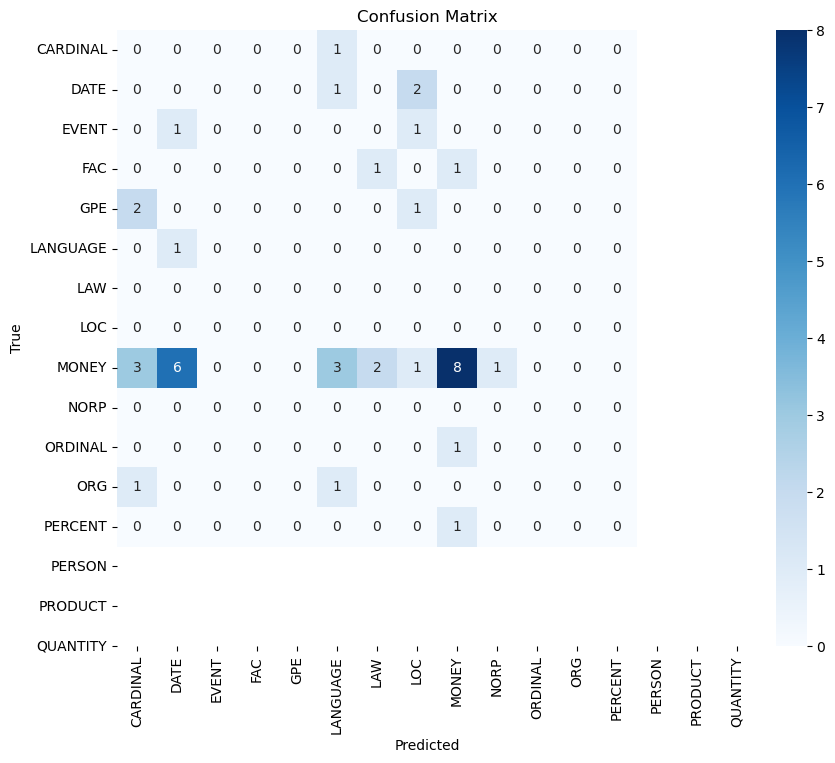

In [447]:
# Subsetting to Evaluate with Classification Reports and a Confusion matrix 

# Subsetting
hand_subset_4 = merged_hand_annotations_4[:40]
spacy_subset_4 = spacy_annotations_4[:40]

# Setting Ground Truth and Predictions
y_true_4 = [label for token, label in hand_subset_4]
y_pred_4 = [label for token, label in spacy_subset_4]

# Evaluation Reports
prec_score_micro_4 = precision_score(y_true_4, y_pred_4, average='micro')
prec_score_weighted_4 = precision_score(y_true_4, y_pred_4, average='weighted')

rec_score_micro_4 = recall_score(y_true_4, y_pred_4, average='micro')
rec_score_weighted_4 = recall_score(y_true_4, y_pred_4, average='weighted')

f1_score_micro_4 = f1_score(y_true_4, y_pred_4, average='micro')
f1_score_weighted_4 = f1_score(y_true_4, y_pred_4, average='weighted')


print("Doc 4 (Chambers 1872 - Sorrow) EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS")
print()
print(f'Micro PRECISION score for subsets = {prec_score_micro_4}')
print(f'Weighted PRECISION score for subsets = {prec_score_weighted_4}')
print()
print(f'Micro RECALL score for subsets = {rec_score_micro_4}')
print(f'Weighted RECALL score for subsets = {rec_score_weighted_4}')
print()
print(f'Micro F1 score for subsets = {f1_score_micro_4}')
print(f'Weighted F1 score for subsets = {f1_score_weighted_4}')
print()

# Confusion Matrix
labels_4 = sorted(list(set(y_true_4 + y_pred_4)))
conf_matrix_4 = confusion_matrix(y_true_4, y_pred_4, labels=labels_4)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_4, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [448]:
# Evaluation Through Set Intersections and Differences 

ground_truth_set_4 = set(merged_hand_annotations_4)
spacy_predictions_set_4 = set(spacy_annotations_4)

true_positives_4 = ground_truth_set_4.intersection(spacy_predictions_set_4)

num_true_positives_4 = len(true_positives_4)
print('True Positives are when hand truth matches spacy predictions')
print(f"Number of True Positives: {num_true_positives_4}")
print()

for entity in true_positives_4:
    print(f"True Positive : {entity}")

True Positives are when hand truth matches spacy predictions
Number of True Positives: 6

True Positive : ('Miss Monitor', 'PERSON')
True Positive : ('Miriam', 'GPE')
True Positive : ('Jane', 'PERSON')
True Positive : ('Miriam Clint', 'PERSON')
True Positive : ('Miriam', 'PERSON')
True Positive : ('419', 'CARDINAL')


In [449]:
false_negatives_4 = ground_truth_set_4.difference(spacy_predictions_set_4)

num_false_negatives_4 = len(false_negatives_4)
print('False Negatives are present in hand truth but not spacy predictions')
print(f"Number of False Negatives: {num_false_negatives_4}")
print()

for entity in false_negatives_4:
    print(f"False Negatives : {entity}")

False Negatives are present in hand truth but not spacy predictions
Number of False Negatives: 32

False Negatives : ('Shakspeare', 'PERSON')
False Negatives : ('Miss M', 'PERSON')
False Negatives : ('Miss Monitor', 'GPE')
False Negatives : ('Miss Clint', 'PERSON')
False Negatives : ('6th', 'DATE')
False Negatives : ('Crest House', 'LOC')
False Negatives : ('A HOUSE OF CARDS', 'WORK_OF_ART')
False Negatives : ('11 A.M.', 'TIME')
False Negatives : ('WILLIAM', 'PERSON')
False Negatives : ('MIRIAM CLINT', 'PERSON')
False Negatives : ('Dr Miriam', 'PERSON')
False Negatives : ('11 d', 'MONEY')
False Negatives : ('Hampstead', 'GPE')
False Negatives : ('cow and a poultry - yard', 'FAC')
False Negatives : ('CHAMBERS', 'PERSON')
False Negatives : ('ROBERT', 'PERSON')
False Negatives : ('Crescent House', 'LOC')
False Negatives : ('country', 'LOC')
False Negatives : ('eight years', 'QUANTITY')
False Negatives : ('Mr Walker', 'PERSON')
False Negatives : ('opera', 'FAC')
False Negatives : ('Mr Clin

In [450]:
false_positives_4 = spacy_predictions_set_4.difference(ground_truth_set_4)

num_false_positives_4 = len(false_positives_4)
print('False Positives are predicted by spacy but are not in hand truth')
print(f"Number of False Positives: {num_false_positives_4}")
print()

for entity in false_positives_4:
    print(f"False Positive : {entity}")

False Positives are predicted by spacy but are not in hand truth
Number of False Positives: 38

False Positive : ('Walter', 'PERSON')
False Positive : ('#', 'MONEY')
False Positive : ('6th', 'ORDINAL')
False Positive : ('Crescent House', 'ORG')
False Positive : ('12', 'MONEY')
False Positive : ('morrow', 'DATE')
False Positive : ('###############################################', 'MONEY')
False Positive : ('one', 'CARDINAL')
False Positive : ('11', 'MONEY')
False Positive : ('six more months', 'DATE')
False Positive : ('REG', 'ORG')
False Positive : ('&', 'ORG')
False Positive : ('first', 'ORDINAL')
False Positive : ('3d', 'CARDINAL')
False Positive : ('11d', 'DATE')
False Positive : ('two', 'CARDINAL')
False Positive : ('eight years', 'DATE')
False Positive : ('winter', 'DATE')
False Positive : ('Clint', 'PERSON')
False Positive : ('JANUARY 6, 1872', 'DATE')
False Positive : ('SATURDAY', 'DATE')
False Positive : ('June', 'DATE')
False Positive : ('CLINT', 'ORG')
False Positive : ('ART

In [451]:
rec_calc_4 = num_true_positives_4 / (num_true_positives_4 + num_false_negatives_4)
prec_calc_4 = num_true_positives_4 / (num_true_positives_4 + num_false_positives_4)
# f1_calc_4 = (2 * prec_calc_4 * rec_calc_4) / (prec_calc_4 + rec_calc_4)

print(f'Evaluation Calculation Reports for Document 4 Chambers Journal 1872')
print()
print(f'Recall Score = {rec_calc_4}')
print(f'Precision Score = {prec_calc_4}')
print(f'F1 Score = Divide by 0 Problem')

Evaluation Calculation Reports for Document 4 Chambers Journal 1872

Recall Score = 0.15789473684210525
Precision Score = 0.13636363636363635
F1 Score = Divide by 0 Problem


## Document 5 Comparison: Clipping from SDCGK Annual Report 1888 (on their Constitution)

In [452]:
hand_annotated_data_5 = []
with open("Useful_Knowledge_Annotations_iob_3/DOCUMENT-omonroe2_illinois_edu/SDCGK_AnnualReport_constitution_1888.txt.tsv", "r", encoding="utf-8") as iob_file_5:
    for line in iob_file_5:
        line = line.strip()
        if line:
            token, label = line.split("\t")
           
            hand_annotated_data_5.append((token, label))

hand_annotated_tagged_5 = [(token, label) for token, label in hand_annotated_data_5 if label != 'O']

merged_hand_annotations_5 = merge_iob_tokens(hand_annotated_tagged_5)

print(f'Hand Annotations List number = {len(merged_hand_annotations_5)}')
merged_hand_annotations_5 

Hand Annotations List number = 104


[('Society for tbe Diffusion of Christian anO General IRnowlehae among the Chinese',
  'ORG'),
 ('Society', 'ORG'),
 ('Society for the Diffusion of Christian and General Knowledge among the Chinese',
  'ORG'),
 ('Chinese', 'LANGUAGE'),
 ('the Society', 'ORG'),
 ('Printing Press', 'FAC'),
 ('the Book and Tract Society of China', 'ORG'),
 ('China', 'GPE'),
 ('Colonies', 'LOC'),
 ('Dependencies', 'LOC'),
 ('Chinamen', 'NORP'),
 ('Society', 'ORG'),
 ('books', 'PRODUCT'),
 ('articles', 'PRODUCT'),
 ('tracts', 'PRODUCT'),
 ('intelligent classes in China', 'ORG'),
 ('Society', 'ORG'),
 ('Chinese Book and Tract Society', 'ORG'),
 ('Glasgow', 'GPE'),
 ('December 1884', 'DATE'),
 ('Society for the Diffusion of Christian and General Knowledge among the Chinese',
  'ORG'),
 ('1887', 'DATE'),
 ('Christian Literature Society', 'GPE'),
 ('1905', 'DATE'),
 ('1894', 'DATE'),
 ('Chinese', 'LANGUAGE'),
 ('works', 'PRODUCT'),
 ('Board', 'ORG'),
 ('Shanghai', 'GPE'),
 ('Capital', 'GPE'),
 ('cities', 'LOC')

In [453]:
# Loading Document 5
with open('Useful_Knowledge_Texts/Clipped_Texts/SDCGK_AnnualReport_constitution_1888.txt', "r", encoding="utf-8") as text_file_5:
    text_5 = text_file_5.read()

In [454]:
doc_5 = nlp(text_5)
spacy_annotations_5 = [(ent.text, ent.label_) for ent in doc_5.ents]

print(f'Spacy Annotations List number = {len(spacy_annotations_5)}')
spacy_annotations_5

Spacy Annotations List number = 118


[('17', 'MONEY'),
 ('#################################################', 'MONEY'),
 ('IRnowlehae', 'PERSON'),
 ('Chinese', 'NORP'),
 ('§', 'NORP'),
 ('English', 'LANGUAGE'),
 ('Chinese', 'NORP'),
 ('Chinese', 'NORP'),
 ('rJ %', 'PERCENT'),
 ('Article II', 'LAW'),
 ('Society', 'ORG'),
 ('the Printing Press', 'ORG'),
 ('the Book and Tract \n Society of China', 'WORK_OF_ART'),
 ('2', 'CARDINAL'),
 ('Christian', 'NORP'),
 ('China', 'GPE'),
 ('Society', 'ORG'),
 ('Article III', 'LAW'),
 ('Mode', 'PERSON'),
 ('first', 'ORDINAL'),
 ('Christian', 'NORP'),
 ('Chinese', 'NORP'),
 ('Second', 'ORDINAL'),
 ('China', 'GPE'),
 ('Third', 'ORDINAL'),
 ('first', 'ORDINAL'),
 ('Chinese Book and Tract \n Society', 'WORK_OF_ART'),
 ('Glasgow', 'GPE'),
 ('December 1884', 'DATE'),
 ('Chinese', 'NORP'),
 ('1887', 'DATE'),
 ('Christian', 'NORP'),
 ('1905', 'DATE'),
 ('1894', 'DATE'),
 ('Chinese', 'NORP'),
 ('1910', 'DATE'),
 ('#', 'MONEY'),
 ('18', 'MONEY'),
 ('#################################################

Doc 5 (SDCGKAC 1888 - Constitution) EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS

Micro PRECISION score for subsets = 0.14
Weighted PRECISION score for subsets = 0.25975000000000004

Micro RECALL score for subsets = 0.14
Weighted RECALL score for subsets = 0.13999999999999999

Micro F1 score for subsets = 0.14
Weighted F1 score for subsets = 0.18187290969899664



/Users/owenmonroe/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/owenmonroe/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


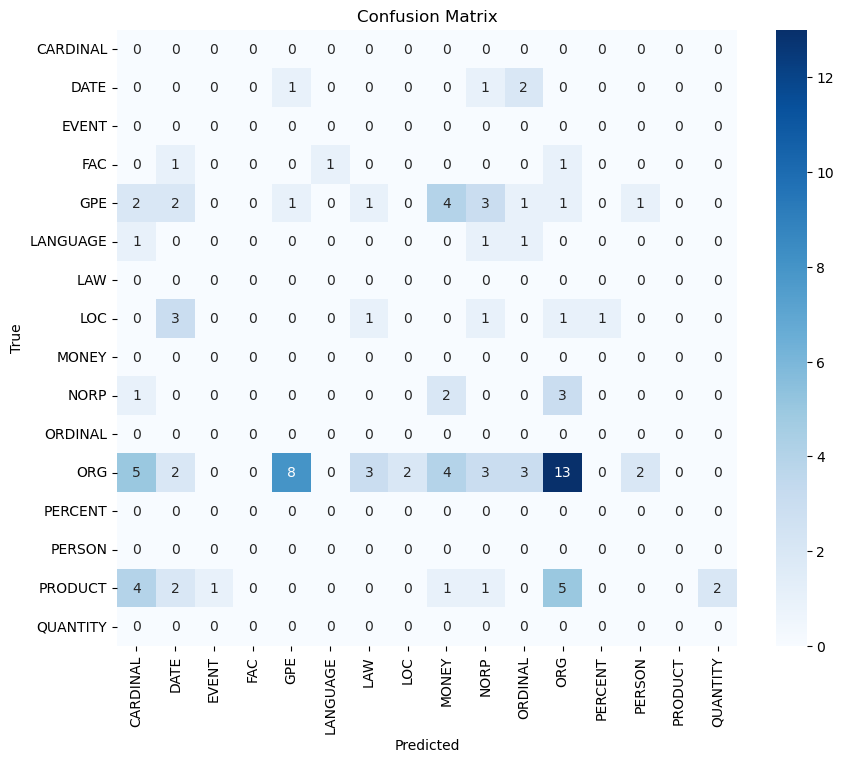

In [455]:
# Subsetting to Evaluate with Classification Reports and a Confusion matrix 

# Subsetting
hand_subset_5 = merged_hand_annotations_5[:100]
spacy_subset_5 = spacy_annotations_5[:100]

# Setting Ground Truth and Predictions
y_true_5 = [label for token, label in hand_subset_5]
y_pred_5 = [label for token, label in spacy_subset_5]

# Evaluation Reports
prec_score_micro_5 = precision_score(y_true_5, y_pred_5, average='micro')
prec_score_weighted_5 = precision_score(y_true_5, y_pred_5, average='weighted')

rec_score_micro_5 = recall_score(y_true_5, y_pred_5, average='micro')
rec_score_weighted_5 = recall_score(y_true_5, y_pred_5, average='weighted')

f1_score_micro_5 = f1_score(y_true_5, y_pred_5, average='micro')
f1_score_weighted_5 = f1_score(y_true_5, y_pred_5, average='weighted')


print("Doc 5 (SDCGKAC 1888 - Constitution) EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS")
print()
print(f'Micro PRECISION score for subsets = {prec_score_micro_5}')
print(f'Weighted PRECISION score for subsets = {prec_score_weighted_5}')
print()
print(f'Micro RECALL score for subsets = {rec_score_micro_5}')
print(f'Weighted RECALL score for subsets = {rec_score_weighted_5}')
print()
print(f'Micro F1 score for subsets = {f1_score_micro_5}')
print(f'Weighted F1 score for subsets = {f1_score_weighted_5}')
print()

# Confusion Matrix
labels_5 = sorted(list(set(y_true_5 + y_pred_5)))
conf_matrix_5 = confusion_matrix(y_true_5, y_pred_5, labels=labels_5)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_5, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [456]:
# Evaluation Through Set Intersections and Differences 

ground_truth_set_5 = set(merged_hand_annotations_5)
spacy_predictions_set_5 = set(spacy_annotations_5)

true_positives_5 = ground_truth_set_5.intersection(spacy_predictions_set_5)

num_true_positives_5 = len(true_positives_5)
print('True Positives are when hand truth matches spacy predictions')
print(f"Number of True Positives: {num_true_positives_5}")
print()

for entity in true_positives_5:
    print(f"True Positive : {entity}")

True Positives are when hand truth matches spacy predictions
Number of True Positives: 16

True Positive : ('Society', 'ORG')
True Positive : ('1894', 'DATE')
True Positive : ('December 1884', 'DATE')
True Positive : ('China', 'GPE')
True Positive : ('Singapore', 'GPE')
True Positive : ('Shanghai', 'GPE')
True Positive : ('Yokohama', 'GPE')
True Positive : ('Glasgow', 'GPE')
True Positive : ('Board', 'ORG')
True Positive : ('Hongkong', 'GPE')
True Positive : ('Chinese', 'NORP')
True Positive : ('Directors', 'ORG')
True Positive : ('Peking', 'GPE')
True Positive : ('1905', 'DATE')
True Positive : ('Penang', 'GPE')
True Positive : ('1887', 'DATE')


In [457]:
false_negatives_5 = ground_truth_set_5.difference(spacy_predictions_set_5)

num_false_negatives_5 = len(false_negatives_5)
print('False Negatives are present in hand truth but not spacy predictions')
print(f"Number of False Negatives: {num_false_negatives_5}")
print()

for entity in false_negatives_5:
    print(f"False Negatives : {entity}")

False Negatives are present in hand truth but not spacy predictions
Number of False Negatives: 50

False Negatives : ('Board of Directors', 'ORG')
False Negatives : ('mem ¬ bers', 'ORG')
False Negatives : ('articles', 'PRODUCT')
False Negatives : ('members', 'ORG')
False Negatives : ('the Society', 'ORG')
False Negatives : ('Sub - Committees', 'ORG')
False Negatives : ('Printing Press', 'FAC')
False Negatives : ('Chinamen', 'NORP')
False Negatives : ('empire', 'LOC')
False Negatives : ('officials', 'NORP')
False Negatives : ('Dependencies', 'LOC')
False Negatives : ('the Book and Tract Society of China', 'ORG')
False Negatives : ('information', 'PRODUCT')
False Negatives : ('Powers of the Board', 'ORG')
False Negatives : ('office - bearers', 'ORG')
False Negatives : ('periodical literature', 'PRODUCT')
False Negatives : ('The Board', 'ORG')
False Negatives : ('Batavia', 'GPE')
False Negatives : ('Local Associations', 'ORG')
False Negatives : ('Retiring Members of Board', 'ORG')
False N

In [458]:
false_positives_5 = spacy_predictions_set_5.difference(ground_truth_set_5)

num_false_positives_5 = len(false_positives_5)
print('False Positives are predicted by spacy but are not in hand truth')
print(f"Number of False Positives: {num_false_positives_5}")
print()

for entity in false_positives_5:
    print(f"False Positive : {entity}")

False Positives are predicted by spacy but are not in hand truth
Number of False Positives: 59

False Positive : ('Article II', 'LAW')
False Positive : ('Fourth', 'ORDINAL')
False Positive : ('the second week', 'DATE')
False Positive : ('recent years', 'DATE')
False Positive : ('#', 'MONEY')
False Positive : ('§', 'NORP')
False Positive : ('Divine Truth', 'ORG')
False Positive : ('the Annual General Meeting', 'EVENT')
False Positive : ('IRnowlehae', 'PERSON')
False Positive : ('the Book and Tract \n Society of China', 'WORK_OF_ART')
False Positive : ('half', 'CARDINAL')
False Positive : ('one', 'CARDINAL')
False Positive : ('Capital', 'LOC')
False Positive : ('Third', 'ORDINAL')
False Positive : ('Society’s', 'ORG')
False Positive : ('Article YI', 'LAW')
False Positive : ('Sixth', 'ORDINAL')
False Positive : ('first', 'ORDINAL')
False Positive : ('One-third', 'CARDINAL')
False Positive : ('each year', 'DATE')
False Positive : ('Chinese Book and Tract \n Society', 'WORK_OF_ART')
False P

In [459]:
rec_calc_5 = num_true_positives_5 / (num_true_positives_5 + num_false_negatives_5)
prec_calc_5 = num_true_positives_5 / (num_true_positives_5 + num_false_positives_5)
f1_calc_5 = (2 * prec_calc_5 * rec_calc_5) / (prec_calc_5 + rec_calc_5)

print(f'Evaluation Calculation Reports for Document 5 SDCGKAC Annual Report 1888')
print()
print(f'Recall Score = {rec_calc_5}')
print(f'Precision Score = {prec_calc_5}')
print(f'F1 Score = {f1_calc_5}')

Evaluation Calculation Reports for Document 5 SDCGKAC Annual Report 1888

Recall Score = 0.24242424242424243
Precision Score = 0.21333333333333335
F1 Score = 0.22695035460992907


## Document 6 Comparison: Clipping from SDCGK Annual Report 1893 (on their Committee Publications)

In [460]:
hand_annotated_data_6 = []
with open("Useful_Knowledge_Annotations_iob_3/DOCUMENT-omonroe2_illinois_edu/SDCGKC_AnnualReport_committee_publications_1893.txt.tsv", "r", encoding="utf-8") as iob_file_6:
    for line in iob_file_6:
        line = line.strip()
        if line:
            token, label = line.split("\t")
           
            hand_annotated_data_6.append((token, label))

hand_annotated_tagged_6 = [(token, label) for token, label in hand_annotated_data_6 if label != 'O']

merged_hand_annotations_6 = merge_iob_tokens(hand_annotated_tagged_6)

print(f'Hand Annotations List number = {len(merged_hand_annotations_6)}')
merged_hand_annotations_6

Hand Annotations List number = 183


[('Society', 'ORG'),
 ('Publications', 'PRODUCT'),
 ('Empress Dowager', 'PERSON'),
 ('September', 'DATE'),
 ('6,000', 'CARDINAL'),
 ('publications', 'PRODUCT'),
 ('ten', 'CARDINAL'),
 ('provinces', 'LOC'),
 ('60,000', 'CARDINAL'),
 ('720,000', 'CARDINAL'),
 ('pages', 'PRODUCT'),
 ('gratis', 'MONEY'),
 ('Society', 'ORG'),
 ('Branch Depdts', 'ORG'),
 ('provinces', 'LOC'),
 ('Publications', 'PRODUCT'),
 ('Peking', 'GPE'),
 ('Moukden', 'GPE'),
 ('Tientsin', 'GPE'),
 ('Shensi', 'GPE'),
 ('Nanking', 'GPE'),
 ('Chefoo', 'GPE'),
 ('$ 100', 'MONEY'),
 ('Dr . Faber', 'PERSON'),
 ('book', 'PRODUCT'),
 ('5', 'CARDINAL'),
 ('Chinese', 'LANGUAGE'),
 ('Western Civilization', 'LOC'),
 ('Rev . P . Kranz', 'PERSON'),
 ('edition', 'PRODUCT'),
 ('two thousand', 'CARDINAL'),
 ('copies', 'PRODUCT'),
 ('Mandarins', 'NORP'),
 ('Empire', 'GPE'),
 ('Dr . Williamson', 'PERSON'),
 ('the English Baptist Mission', 'NORP'),
 ('works', 'PRODUCT'),
 ('book', 'PRODUCT'),
 ('George Jamieson', 'PERSON'),
 ('China', 'GPE'

In [461]:
# Loading Document 6
with open('Useful_Knowledge_Texts/Clipped_Texts/SDCGKC_AnnualReport_committee_publications_1893.txt', "r", encoding="utf-8") as text_file_6:
    text_6 = text_file_6.read()

In [462]:
doc_6 = nlp(text_6)
spacy_annotations_6 = [(ent.text, ent.label_) for ent in doc_6.ents]

print(f'Spacy Annotations List number = {len(spacy_annotations_6)}')
spacy_annotations_6

Spacy Annotations List number = 203


[('#', 'MONEY'),
 ('5', 'MONEY'),
 ('IReport \n \n W E', 'ORG'),
 ('this year', 'DATE'),
 ('The Grace Examinations', 'ORG'),
 ('the age of 60', 'DATE'),
 ('September', 'DATE'),
 ('6,000', 'CARDINAL'),
 ('ten', 'CARDINAL'),
 ('60,000', 'CARDINAL'),
 ('720,000', 'CARDINAL'),
 ('Society', 'ORG'),
 ('Branch Depdts \n ', 'ORG'),
 ('Publications', 'ORG'),
 ('Peking', 'GPE'),
 ('Moukden', 'GPE'),
 ('Tientsin', 'GPE'),
 ('Chefoo', 'GPE'),
 ('100', 'MONEY'),
 ('this year', 'DATE'),
 ('Civilization', 'ORG'),
 ('Chinese', 'NORP'),
 ('Volumes', 'PERSON'),
 ('P. Kranz', 'PERSON'),
 ('two thousand', 'CARDINAL'),
 ('Williamson \n ', 'PERSON'),
 ('the English Baptist Mission', 'ORG'),
 ('Christianity', 'NORP'),
 ('#', 'MONEY'),
 ('6', 'MONEY'),
 ('##################################################', 'MONEY'),
 ('George Jamieson’s', 'PERSON'),
 ('China', 'GPE'),
 ('the Rise and Progress of the Christian', 'ORG'),
 ('millions', 'CARDINAL'),
 ('the United Society of \n Christian Endeavour', 'ORG'),
 ('Ch

Doc 5 (SDCGKAC 1888 - Constitution) EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS

Micro PRECISION score for subsets = 0.3
Weighted PRECISION score for subsets = 0.30124159522223654

Micro RECALL score for subsets = 0.3
Weighted RECALL score for subsets = 0.3

Micro F1 score for subsets = 0.3
Weighted F1 score for subsets = 0.2926570767195767



/Users/owenmonroe/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/owenmonroe/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


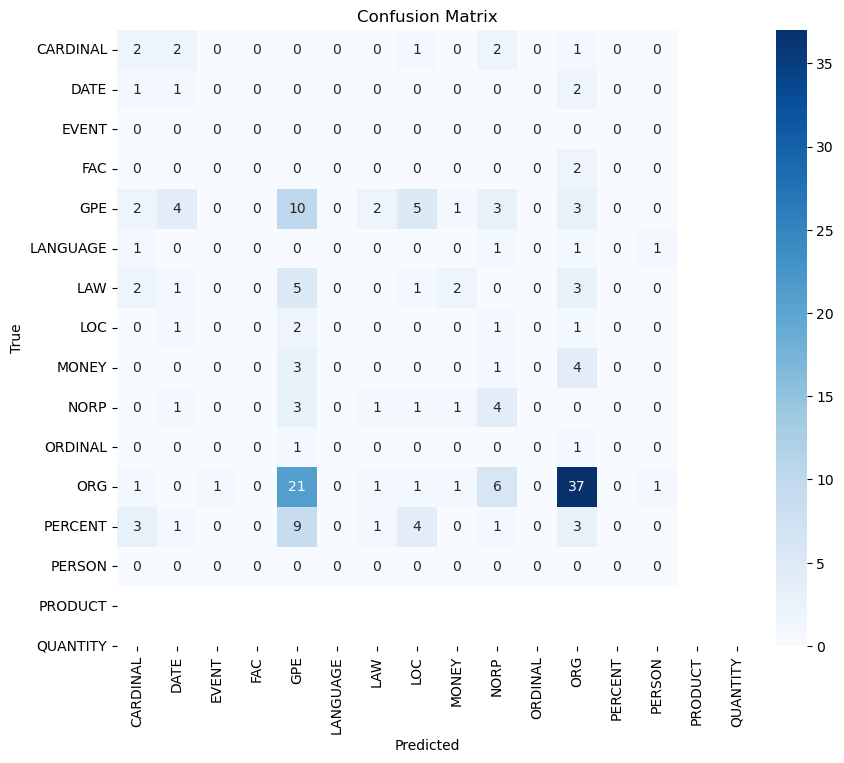

In [463]:
# Subsetting to Evaluate with Classification Reports and a Confusion matrix 

# Subsetting
hand_subset_6 = merged_hand_annotations_6[:180]
spacy_subset_6 = spacy_annotations_6[:180]

# Setting Ground Truth and Predictions
y_true_6 = [label for token, label in hand_subset_6]
y_pred_6 = [label for token, label in spacy_subset_6]

# Evaluation Reports
prec_score_micro_6 = precision_score(y_true_6, y_pred_6, average='micro')
prec_score_weighted_6 = precision_score(y_true_6, y_pred_6, average='weighted')

rec_score_micro_6 = recall_score(y_true_6, y_pred_6, average='micro')
rec_score_weighted_6 = recall_score(y_true_6, y_pred_6, average='weighted')

f1_score_micro_6 = f1_score(y_true_6, y_pred_6, average='micro')
f1_score_weighted_6 = f1_score(y_true_6, y_pred_6, average='weighted')


print("Doc 5 (SDCGKAC 1888 - Constitution) EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS")
print()
print(f'Micro PRECISION score for subsets = {prec_score_micro_6}')
print(f'Weighted PRECISION score for subsets = {prec_score_weighted_6}')
print()
print(f'Micro RECALL score for subsets = {rec_score_micro_6}')
print(f'Weighted RECALL score for subsets = {rec_score_weighted_6}')
print()
print(f'Micro F1 score for subsets = {f1_score_micro_6}')
print(f'Weighted F1 score for subsets = {f1_score_weighted_6}')
print()

# Confusion Matrix
labels_6 = sorted(list(set(y_true_6 + y_pred_6)))
conf_matrix_6 = confusion_matrix(y_true_6, y_pred_6, labels=labels_6)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_6, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [464]:
# Evaluation Through Set Intersections and Differences 

ground_truth_set_6 = set(merged_hand_annotations_6)
spacy_predictions_set_6 = set(spacy_annotations_6)

true_positives_6 = ground_truth_set_6.intersection(spacy_predictions_set_6)

num_true_positives_6 = len(true_positives_6)
print('True Positives are when hand truth matches spacy predictions')
print(f"Number of True Positives: {num_true_positives_6}")
print()

for entity in true_positives_6:
    print(f"True Positive : {entity}")

True Positives are when hand truth matches spacy predictions
Number of True Positives: 27

True Positive : ('Madagascar', 'GPE')
True Positive : ('Society', 'ORG')
True Positive : ('Chefoo', 'GPE')
True Positive : ('1892-93', 'DATE')
True Positive : ('6,000', 'CARDINAL')
True Positive : ('Glasgow', 'GPE')
True Positive : ('60,000', 'CARDINAL')
True Positive : ('Chinese', 'NORP')
True Positive : ('Hankow', 'GPE')
True Positive : ('France', 'GPE')
True Positive : ('two thousand', 'CARDINAL')
True Positive : ('Japan', 'GPE')
True Positive : ('million', 'CARDINAL')
True Positive : ('Moukden', 'GPE')
True Positive : ('720,000', 'CARDINAL')
True Positive : ('West', 'LOC')
True Positive : ('Europe', 'LOC')
True Positive : ('ten', 'CARDINAL')
True Positive : ('India', 'GPE')
True Positive : ('millions', 'CARDINAL')
True Positive : ('China', 'GPE')
True Positive : ('Tientsin', 'GPE')
True Positive : ('Shantung', 'GPE')
True Positive : ('Peking', 'GPE')
True Positive : ('Shanghai', 'GPE')
True P

In [465]:
false_negatives_6 = ground_truth_set_6.difference(spacy_predictions_set_6)

num_false_negatives_6 = len(false_negatives_6)
print('False Negatives are present in hand truth but not spacy predictions')
print(f"Number of False Negatives: {num_false_negatives_6}")
print()

for entity in false_negatives_6:
    print(f"False Negatives : {entity}")

False Negatives are present in hand truth but not spacy predictions
Number of False Negatives: 128

False Negatives : ('W . R . Carles , Esq', 'PERSON')
False Negatives : ('C . Cromie , Esq', 'PERSON')
False Negatives : ('Secretaries', 'ORG')
False Negatives : ('millions of pounds', 'MONEY')
False Negatives : ('E . H . Wheeley , Esq', 'PERSON')
False Negatives : ('The Yen . Archdeacon Moule , B . D', 'PERSON')
False Negatives : ('Rev . H . C . Hodges , M . A', 'PERSON')
False Negatives : ('1 U 0 per cent', 'PERCENT')
False Negatives : ('Rev . John Stevens', 'PERSON')
False Negatives : ('Rev . Dr . Edkins', 'PERSON')
False Negatives : ('35 years', 'DATE')
False Negatives : ('G . Detring , Esq', 'PERSON')
False Negatives : ('John Macgregor , Esq', 'PERSON')
False Negatives : ('Articles', 'PRODUCT')
False Negatives : ('R . E . Bredon , Esq', 'PERSON')
False Negatives : ('South', 'LOC')
False Negatives : ('Periodicals', 'PRODUCT')
False Negatives : ('Rev . W . Muirhead', 'PERSON')
False Ne

In [466]:
false_positives_6 = spacy_predictions_set_6.difference(ground_truth_set_6)

num_false_positives_6 = len(false_positives_6)
print('False Positives are predicted by spacy but are not in hand truth')
print(f"Number of False Positives: {num_false_positives_6}")
print()

for entity in false_positives_6:
    print(f"False Positive : {entity}")

False Positives are predicted by spacy but are not in hand truth
Number of False Positives: 113

False Positive : ('Celestial Empire', 'ORG')
False Positive : ('C. Cromie', 'PERSON')
False Positive : ('H. R. Hearn', 'PERSON')
False Positive : ('the many millions \n ', 'CARDINAL')
False Positive : ('R. M. Campbell', 'PERSON')
False Positive : ('J. G. Purdon', 'PERSON')
False Positive : ('E. B. Drew', 'PERSON')
False Positive : ('D.D.', 'GPE')
False Positive : ('#3)', 'MONEY')
False Positive : ('the Ladies’ Society in', 'EVENT')
False Positive : ('36 per cent', 'MONEY')
False Positive : ('H. M. Hillier', 'PERSON')
False Positive : ('George Jamieson’s', 'PERSON')
False Positive : ('J. A. Leonard', 'PERSON')
False Positive : ('10', 'CARDINAL')
False Positive : ('the age of 60', 'DATE')
False Positive : ('M.A. \n George Jamieson', 'ORG')
False Positive : ('6', 'MONEY')
False Positive : ('Y. J. Allen', 'PERSON')
False Positive : ('Tientsin', 'PERSON')
False Positive : ('7', 'MONEY')
False Po

In [467]:
rec_calc_6 = num_true_positives_6 / (num_true_positives_6 + num_false_negatives_6)
prec_calc_6 = num_true_positives_6 / (num_true_positives_6 + num_false_positives_6)
f1_calc_6 = (2 * prec_calc_6 * rec_calc_6) / (prec_calc_6 + rec_calc_6)

print(f'Evaluation Calculation Reports for Document 6 SDCGKAC Annual Report 1893')
print()
print(f'Recall Score = {rec_calc_6}')
print(f'Precision Score = {prec_calc_6}')
print(f'F1 Score = {f1_calc_6}')

Evaluation Calculation Reports for Document 6 SDCGKAC Annual Report 1893

Recall Score = 0.17419354838709677
Precision Score = 0.19285714285714287
F1 Score = 0.18305084745762715


## Document 7 Comparison: Clipping from British Almanac 1855 (on Thermo-Copernicans)


In [468]:
hand_annotated_data_7 = []
with open("Useful_Knowledge_Annotations_iob_3/DOCUMENT-omonroe2_illinois_edu/SDUK_Almanac_thermo_copernicans_1855.txt.tsv", "r", encoding="utf-8") as iob_file_7:
    for line in iob_file_7:
        line = line.strip()
        if line:
            token, label = line.split("\t")
           
            hand_annotated_data_7.append((token, label))

hand_annotated_tagged_7 = [(token, label) for token, label in hand_annotated_data_7 if label != 'O']

merged_hand_annotations_7 = merge_iob_tokens(hand_annotated_tagged_7)

print(f'Hand Annotations List number = {len(merged_hand_annotations_7)}')
merged_hand_annotations_7

Hand Annotations List number = 159


[('Nov . 1853', 'DATE'),
 ('Oct . 1854', 'DATE'),
 ('Royal Observatory', 'NORP'),
 ('Greenwich', 'GPE'),
 ('the Royal Society', 'NORP'),
 ('twelve', 'CARDINAL'),
 ('1833', 'DATE'),
 ('1854', 'DATE'),
 ('publication', 'PRODUCT'),
 ('1853', 'DATE'),
 ('16 h . 34 m', 'TIME'),
 ('6th of July', 'DATE'),
 ('16 h . 24 m', 'TIME'),
 ('10 m', 'TIME'),
 ('July the 6th', 'DATE'),
 ('10 m', 'TIME'),
 ('Almanac', 'PRODUCT'),
 ('Almanac', 'PRODUCT'),
 ('16th of February', 'DATE'),
 ('6 h . 47 m', 'TIME'),
 ('the 17th', 'DATE'),
 ('17 h . 23 m', 'TIME'),
 ('1833', 'DATE'),
 ('1855', 'DATE'),
 ('January , 1855', 'DATE'),
 ('1855', 'DATE'),
 ('Roman Year 2608', 'DATE'),
 ('7 347 A.M.', 'DATE'),
 ('615 A.M.', 'TIME'),
 ('8th Pharmuti 2603 Ær . Nab .', 'DATE'),
 ('24th Cohiac 2601 A . Æg .', 'DATE'),
 ('6568', 'DATE'),
 ('24th Cohiac 1571 Ær', 'DATE'),
 ('Alexander', 'PERSON'),
 ('Tyre', 'GPE'),
 ('Antioch', 'PERSON'),
 ('1902', 'DATE'),
 ('Abraham', 'PERSON'),
 ('3870 Ær', 'DATE'),
 ('1893 A . Cæs', 'DA

In [469]:
# Loading Document 7
with open('Useful_Knowledge_Texts/Clipped_Texts/SDUK_Almanac_thermo_copernicans_1855.txt', "r", encoding="utf-8") as text_file_7:
    text_7 = text_file_7.read()

In [470]:
doc_7 = nlp(text_7)
spacy_annotations_7 = [(ent.text, ent.label_) for ent in doc_7.ents]

print(f'Spacy Annotations List number = {len(spacy_annotations_7)}')
spacy_annotations_7

Spacy Annotations List number = 237


[('Thermometrical Register', 'WORK_OF_ART'),
 ('The Thermometrical Register', 'ORG'),
 ('Nov. 1853', 'DATE'),
 ('Oct. 1854', 'DATE'),
 ('the Royal\nObservatory', 'FAC'),
 ('Greenwich', 'PERSON'),
 ('the Royal Society', 'ORG'),
 ('twelve', 'CARDINAL'),
 ('Each month', 'DATE'),
 ('the last two months of 1833', 'DATE'),
 ('the ten months of 1854', 'DATE'),
 ('hours and minutes', 'TIME'),
 ('Day', 'PERSON'),
 ('hours and minutes', 'TIME'),
 ('the day', 'DATE'),
 ('the shortest day', 'DATE'),
 ('Day', 'PERSON'),
 ('the day', 'DATE'),
 ('the longest day', 'DATE'),
 ('the longest day', 'DATE'),
 ('1853', 'DATE'),
 ('16h', 'DATE'),
 ('34', 'CARDINAL'),
 ('the 6th of July', 'DATE'),
 ('the day', 'DATE'),
 ('hours and minutes', 'TIME'),
 ('16h', 'DATE'),
 ('24', 'CARDINAL'),
 ('the\nday', 'DATE'),
 ('10', 'CARDINAL'),
 ('the longest day', 'DATE'),
 ('July the 6th', 'DATE'),
 ('10', 'CARDINAL'),
 ('Equation of Time', 'WORK_OF_ART'),
 ('minutes and seconds', 'TIME'),
 ('the\nday', 'DATE'),
 ('days

Doc 5 (SDCGKAC 1888 - Constitution) EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS

Micro PRECISION score for subsets = 0.2
Weighted PRECISION score for subsets = 0.36589717128416815

Micro RECALL score for subsets = 0.2
Weighted RECALL score for subsets = 0.2

Micro F1 score for subsets = 0.20000000000000004
Weighted F1 score for subsets = 0.22203996409475862



/Users/owenmonroe/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


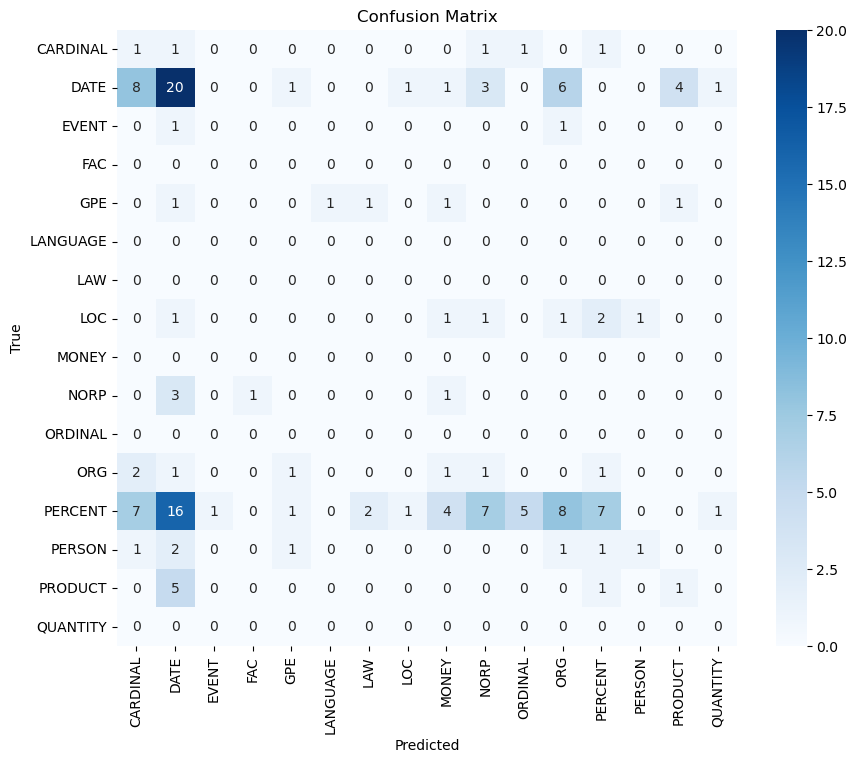

In [471]:
# Subsetting to Evaluate with Classification Reports and a Confusion matrix 

# Subsetting
hand_subset_7 = merged_hand_annotations_7[:150]
spacy_subset_7 = spacy_annotations_7[:150]

# Setting Ground Truth and Predictions
y_true_7 = [label for token, label in hand_subset_7]
y_pred_7 = [label for token, label in spacy_subset_7]

# Evaluation Reports
prec_score_micro_7 = precision_score(y_true_7, y_pred_7, average='micro')
prec_score_weighted_7 = precision_score(y_true_7, y_pred_7, average='weighted')

rec_score_micro_7 = recall_score(y_true_7, y_pred_7, average='micro')
rec_score_weighted_7 = recall_score(y_true_7, y_pred_7, average='weighted')

f1_score_micro_7 = f1_score(y_true_7, y_pred_7, average='micro')
f1_score_weighted_7 = f1_score(y_true_7, y_pred_7, average='weighted')


print("Doc 5 (SDCGKAC 1888 - Constitution) EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS")
print()
print(f'Micro PRECISION score for subsets = {prec_score_micro_7}')
print(f'Weighted PRECISION score for subsets = {prec_score_weighted_7}')
print()
print(f'Micro RECALL score for subsets = {rec_score_micro_7}')
print(f'Weighted RECALL score for subsets = {rec_score_weighted_7}')
print()
print(f'Micro F1 score for subsets = {f1_score_micro_7}')
print(f'Weighted F1 score for subsets = {f1_score_weighted_7}')
print()

# Confusion Matrix
labels_7 = sorted(list(set(y_true_7 + y_pred_7)))
conf_matrix_7 = confusion_matrix(y_true_7, y_pred_7, labels=labels_7)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_7, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [472]:
# Evaluation Through Set Intersections and Differences 

ground_truth_set_7 = set(merged_hand_annotations_7)
spacy_predictions_set_7 = set(spacy_annotations_7)

true_positives_7 = ground_truth_set_7.intersection(spacy_predictions_set_7)

num_true_positives_7 = len(true_positives_7)
print('True Positives are when hand truth matches spacy predictions')
print(f"Number of True Positives: {num_true_positives_7}")
print()

for entity in true_positives_7:
    print(f"True Positive : {entity}")

True Positives are when hand truth matches spacy predictions
Number of True Positives: 25

True Positive : ('1902', 'DATE')
True Positive : ('twelve', 'CARDINAL')
True Positive : ('Erasmus Rheinhold', 'PERSON')
True Positive : ('1853', 'DATE')
True Positive : ('Nicholas Copernicus', 'PERSON')
True Positive : ('George Joachim Rheticus', 'PERSON')
True Positive : ('9', 'CARDINAL')
True Positive : ('12th Kagnots 1303', 'DATE')
True Positive : ('1540', 'DATE')
True Positive : ('1855', 'DATE')
True Positive : ('1609', 'DATE')
True Positive : ('Leonardo da Vinci', 'PERSON')
True Positive : ('Italians', 'NORP')
True Positive : ('Riccioli', 'PERSON')
True Positive : ('1533', 'DATE')
True Positive : ('Ramus', 'PERSON')
True Positive : ('Thomas Digges', 'PERSON')
True Positive : ('1543', 'DATE')
True Positive : ('138', 'CARDINAL')
True Positive : ('1620', 'DATE')
True Positive : ('earth', 'LOC')
True Positive : ('July the 6th', 'DATE')
True Positive : ('Poland', 'GPE')
True Positive : ('8', 'CAR

In [473]:
false_negatives_7 = ground_truth_set_7.difference(spacy_predictions_set_7)

num_false_negatives_7 = len(false_negatives_7)
print('False Negatives are present in hand truth but not spacy predictions')
print(f"Number of False Negatives: {num_false_negatives_7}")
print()

for entity in false_negatives_7:
    print(f"False Negatives : {entity}")

False Negatives are present in hand truth but not spacy predictions
Number of False Negatives: 71

False Negatives : ('Gassarus', 'PERSON')
False Negatives : ('Greenwich', 'GPE')
False Negatives : ('Penny Cyclopædia', 'PRODUCT')
False Negatives : ('1500', 'DATE')
False Negatives : ('Poos or Margaly 4956 Cal', 'DATE')
False Negatives : ('1553', 'DATE')
False Negatives : ('publication', 'PRODUCT')
False Negatives : ('the 17th', 'DATE')
False Negatives : ('6th of July', 'DATE')
False Negatives : ('Paris', 'GPE')
False Negatives : ('Nov . 1853', 'DATE')
False Negatives : ('CO - PERNICUS', 'PERSON')
False Negatives : ('the Inquisition', 'EVENT')
False Negatives : ('University of Paris', 'ORG')
False Negatives : ('January , 1855', 'DATE')
False Negatives : ('Galileo', 'PERSON')
False Negatives : ('24th Cohiac 1571 Ær', 'DATE')
False Negatives : ('Persian Era of Yezdegird III . ( Parsee account ) 1224 A . Pers .', 'DATE')
False Negatives : ('8th Pharmuti 2603 Ær . Nab .', 'DATE')
False Negati

In [474]:
false_positives_7 = spacy_predictions_set_7.difference(ground_truth_set_7)

num_false_positives_7 = len(false_positives_7)
print('False Positives are predicted by spacy but are not in hand truth')
print(f"Number of False Positives: {num_false_positives_7}")
print()

for entity in false_positives_7:
    print(f"False Positive : {entity}")

False Positives are predicted by spacy but are not in hand truth
Number of False Positives: 131

False Positive : ('days', 'DATE')
False Positive : ('THE YEAR 1855', 'DATE')
False Positive : ('tenths of days', 'DATE')
False Positive : ('the sixteenth century', 'DATE')
False Positive : ('minutes and seconds', 'TIME')
False Positive : ('French revolution', 'DATE')
False Positive : ('1543).—The', 'CARDINAL')
False Positive : ('year 1833', 'DATE')
False Positive : ('Ist Rabiu II', 'PERSON')
False Positive : ('the month', 'DATE')
False Positive : ('seven-tenths', 'CARDINAL')
False Positive : ('1594', 'DATE')
False Positive : ('the day', 'DATE')
False Positive : ('Widmanstadt\n', 'ORG')
False Positive : ('10', 'CARDINAL')
False Positive : ('the Royal Society', 'ORG')
False Positive : ('Spanish', 'LANGUAGE')
False Positive : ('Copernicus', 'ORG')
False Positive : ('Achilles Gassarus.—His', 'PERSON')
False Positive : ('Galileo', 'PRODUCT')
False Positive : ('3d month of 2178 A.', 'DATE')
False

In [475]:
rec_calc_7 = num_true_positives_7 / (num_true_positives_7 + num_false_negatives_7)
prec_calc_7 = num_true_positives_7 / (num_true_positives_7 + num_false_positives_7)
f1_calc_7 = (2 * prec_calc_7* rec_calc_7) / (prec_calc_7 + rec_calc_7)

print(f'Evaluation Calculation Reports for Document 6 SDCGKAC Annual Report 1893')
print()
print(f'Recall Score = {rec_calc_7}')
print(f'Precision Score = {prec_calc_7}')
print(f'F1 Score = {f1_calc_7}')

Evaluation Calculation Reports for Document 6 SDCGKAC Annual Report 1893

Recall Score = 0.2604166666666667
Precision Score = 0.16025641025641027
F1 Score = 0.1984126984126984


## Document 8 Comparison: Clipping from SDUK British Almanac 1872 (on Music and Photography)


In [476]:
hand_annotated_data_8 = []
with open("Useful_Knowledge_Annotations_iob_3/DOCUMENT-omonroe2_illinois_edu/SDUK_Almanac_thermo_music_photo_1872.txt.tsv", "r", encoding="utf-8") as iob_file_8:
    for line in iob_file_8:
        line = line.strip()
        if line:
            token, label = line.split("\t")
           
            hand_annotated_data_8.append((token, label))

hand_annotated_tagged_8 = [(token, label) for token, label in hand_annotated_data_8 if label != 'O']

merged_hand_annotations_8 = merge_iob_tokens(hand_annotated_tagged_8)

print(f'Hand Annotations List number = {len(merged_hand_annotations_8)}')
merged_hand_annotations_8

Hand Annotations List number = 177


[('Almanac', 'PRODUCT'),
 ('Royal Observatory', 'FAC'),
 ('Greenwich', 'GPE'),
 ('1870', 'DATE'),
 ('1871', 'DATE'),
 ('Almanac', 'PRODUCT'),
 ('1833', 'DATE'),
 ('Almanac', 'PRODUCT'),
 ('8th of April', 'DATE'),
 ('32 m', 'TIME'),
 ('11 h . 28 m', 'TIME'),
 ('United Kingdom', 'GPE'),
 ('1872', 'DATE'),
 ('United Kingdom', 'GPE'),
 ('Scilly Islands', 'GPE'),
 ('Falmouth', 'GPE'),
 ('Plymouth', 'GPE'),
 ('Portland', 'GPE'),
 ('Portsmouth', 'GPE'),
 ('Brighton', 'GPE'),
 ('Dover', 'GPE'),
 ('London', 'GPE'),
 ('Yarmouth', 'GPE'),
 ('Sunderland', 'GPE'),
 ('Edinburgh', 'GPE'),
 ('Glasgow', 'GPE'),
 ('Liverpool', 'GPE'),
 ('Pembroke', 'GPE'),
 ('Holyhead', 'GPE'),
 ('Dublin', 'GPE'),
 ('Belfast', 'GPE'),
 ('Galway', 'GPE'),
 ('Cork', 'GPE'),
 ("Almanac'", 'PRODUCT'),
 ('London', 'PERSON'),
 ('United Kingdom', 'GPE'),
 ('Almanac', 'PRODUCT'),
 ('May 21', 'DATE'),
 ('Edinburgh', 'GPE'),
 ('Almanac', 'PRODUCT'),
 ('4 h . lm . A . m', 'TIME'),
 ('7 h . 52 m . P . M .', 'TIME'),
 ('Edinburgh', 

In [477]:
with open("Useful_Knowledge_Texts/Clipped_Texts/SDUK_Almanac_thermo_music_photo_1872.txt", "r", encoding="utf-8") as text_file_8:
    text_8 = text_file_8.read()

In [478]:
doc_8 = nlp(text_8)
spacy_annotations_8 = [(ent.text, ent.label_) for ent in doc_8.ents]

print(f'Spacy Annotations List number = {len(spacy_annotations_8)}')
spacy_annotations_8

Spacy Annotations List number = 234


[('THE Thermometrical Register', 'ORG'),
 ('the preceding year', 'DATE'),
 ('this year', 'DATE'),
 ('the Royal Observatory', 'FAC'),
 ('twenty-four hours', 'TIME'),
 ('last three months of 1870', 'DATE'),
 ('the nine months of 1871', 'DATE'),
 ('the\nyear 1833', 'DATE'),
 ('Equation of Time', 'WORK_OF_ART'),
 ('Equation of Time', 'WORK_OF_ART'),
 ('minutes and seconds', 'TIME'),
 ('the\nday', 'DATE'),
 ('Moon', 'PERSON'),
 ('days', 'DATE'),
 ('tenths of days', 'DATE'),
 ('New Moon', 'LOC'),
 ('the 8th of April', 'DATE'),
 ('32m. morning', 'TIME'),
 ('noon', 'TIME'),
 ('11h', 'DATE'),
 ('28', 'CARDINAL'),
 ('five-tenths', 'CARDINAL'),
 ('10', 'CARDINAL'),
 ('United Kingdom', 'GPE'),
 ('the year 1872', 'DATE'),
 ('the United Kingdom', 'GPE'),
 ('Scilly', 'DATE'),
 ('22', 'CARDINAL'),
 ('11', 'CARDINAL'),
 ('Falmouth', 'ORG'),
 ('21', 'DATE'),
 ('53', 'CARDINAL'),
 ('Plymouth', 'GPE'),
 ('21', 'DATE'),
 ('27', 'CARDINAL'),
 ('Portland', 'GPE'),
 ('20', 'CARDINAL'),
 ('41', 'CARDINAL'),
 (

Doc 8 (SDUK British Almanac 1872) EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS

Micro PRECISION score for subsets = 0.06
Weighted PRECISION score for subsets = 0.10168300653594772

Micro RECALL score for subsets = 0.06
Weighted RECALL score for subsets = 0.06

Micro F1 score for subsets = 0.06
Weighted F1 score for subsets = 0.07204991087344029



/Users/owenmonroe/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/owenmonroe/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


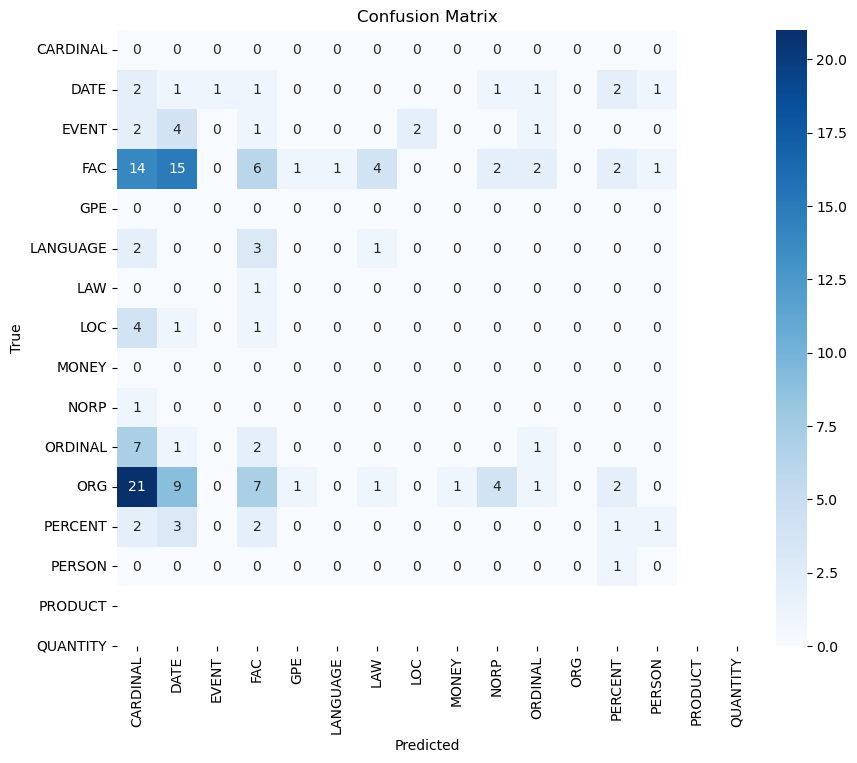

In [479]:
# Subsetting to Evaluate with Classification Reports and a Confusion matrix 

# Subsetting
hand_subset_8 = merged_hand_annotations_8[:150]
spacy_subset_8 = spacy_annotations_8[:150]

# Setting Ground Truth and Predictions
y_true_8 = [label for token, label in hand_subset_8]
y_pred_8 = [label for token, label in spacy_subset_8]

# Evaluation Reports
prec_score_micro_8 = precision_score(y_true_8, y_pred_8, average='micro')
prec_score_weighted_8 = precision_score(y_true_8, y_pred_8, average='weighted')

rec_score_micro_8 = recall_score(y_true_8, y_pred_8, average='micro')
rec_score_weighted_8 = recall_score(y_true_8, y_pred_8, average='weighted')

f1_score_micro_8 = f1_score(y_true_8, y_pred_8, average='micro')
f1_score_weighted_8 = f1_score(y_true_8, y_pred_8, average='weighted')


print("Doc 8 (SDUK British Almanac 1872) EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS")
print()
print(f'Micro PRECISION score for subsets = {prec_score_micro_8}')
print(f'Weighted PRECISION score for subsets = {prec_score_weighted_8}')
print()
print(f'Micro RECALL score for subsets = {rec_score_micro_8}')
print(f'Weighted RECALL score for subsets = {rec_score_weighted_8}')
print()
print(f'Micro F1 score for subsets = {f1_score_micro_8}')
print(f'Weighted F1 score for subsets = {f1_score_weighted_8}')
print()

# Confusion Matrix
labels_8 = sorted(list(set(y_true_8 + y_pred_8)))
conf_matrix_8 = confusion_matrix(y_true_8, y_pred_8, labels=labels_8)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_8, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [480]:
# Evaluation Through Set Intersections and Differences 

ground_truth_set_8 = set(merged_hand_annotations_8)
spacy_predictions_set_8 = set(spacy_annotations_8)

true_positives_8 = ground_truth_set_8.intersection(spacy_predictions_set_8)

num_true_positives_8 = len(true_positives_8)
print('True Positives are when hand truth matches spacy predictions')
print(f"Number of True Positives: {num_true_positives_8}")
print()

for entity in true_positives_8:
    print(f"True Positive : {entity}")

True Positives are when hand truth matches spacy predictions
Number of True Positives: 36

True Positive : ('Greenwich', 'GPE')
True Positive : ('England', 'GPE')
True Positive : ('Dover', 'GPE')
True Positive : ('Brighton', 'GPE')
True Positive : ('Plymouth', 'GPE')
True Positive : ('Switzerland', 'GPE')
True Positive : ('London', 'GPE')
True Positive : ('Fox Talbot', 'PERSON')
True Positive : ('Dublin', 'GPE')
True Positive : ('France', 'GPE')
True Positive : ('Galway', 'GPE')
True Positive : ('Sunderland', 'GPE')
True Positive : ('Asia', 'LOC')
True Positive : ('Christians', 'NORP')
True Positive : ('Little Red Riding Hood', 'WORK_OF_ART')
True Positive : ('Palestine', 'GPE')
True Positive : ('1839', 'DATE')
True Positive : ('India', 'GPE')
True Positive : ('23 minutes', 'TIME')
True Positive : ('America', 'GPE')
True Positive : ('May 21', 'DATE')
True Positive : ('Africa', 'LOC')
True Positive : ('Canada', 'GPE')
True Positive : ('Egypt', 'GPE')
True Positive : ('Great Britain', 'G

In [481]:
false_negatives_8 = ground_truth_set_8.difference(spacy_predictions_set_8)

num_false_negatives_8 = len(false_negatives_8)
print('False Negatives are present in hand truth but not spacy predictions')
print(f"Number of False Negatives: {num_false_negatives_8}")
print()

for entity in false_negatives_8:
    print(f"False Negatives : {entity}")

False Negatives are present in hand truth but not spacy predictions
Number of False Negatives: 97

False Negatives : ('Mr . Fox Talbot', 'PERSON')
False Negatives : ('pictures', 'PRODUCT')
False Negatives : ('reproductions', 'PRODUCT')
False Negatives : ('1871', 'DATE')
False Negatives : ('Pembroke', 'GPE')
False Negatives : ('glaciers', 'LOC')
False Negatives : ('1872', 'DATE')
False Negatives : ('The stereoscopic views', 'PRODUCT')
False Negatives : ('lochs', 'LOC')
False Negatives : ('en - gravings', 'PRODUCT')
False Negatives : ('English people', 'NORP')
False Negatives : ('portraits', 'PRODUCT')
False Negatives : ('Almanac', 'PRODUCT')
False Negatives : ('cities', 'LOC')
False Negatives : ('temples', 'FAC')
False Negatives : ('7 by 31 inches', 'QUANTITY')
False Negatives : ('Royal Observatory', 'FAC')
False Negatives : ('8th of April', 'DATE')
False Negatives : ('works of art', 'PRODUCT')
False Negatives : ('Talbotype', 'PRODUCT')
False Negatives : ('4 h . Im', 'TIME')
False Negat

In [482]:
false_positives_8 = spacy_predictions_set_8.difference(ground_truth_set_8)

num_false_positives_8 = len(false_positives_8)
print('False Positives are predicted by spacy but are not in hand truth')
print(f"Number of False Positives: {num_false_positives_8}")
print()

for entity in false_positives_8:
    print(f"False Positive : {entity}")

False Positives are predicted by spacy but are not in hand truth
Number of False Positives: 133

False Positive : ('Royal Academy', 'ORG')
False Positive : ('the\nmonth-day', 'DATE')
False Positive : ('the nine months of 1871', 'DATE')
False Positive : ('days', 'DATE')
False Positive : ('twenty-four hours', 'TIME')
False Positive : ('tenths of days', 'DATE')
False Positive : ('30', 'CARDINAL')
False Positive : ('minutes and seconds', 'TIME')
False Positive : ('Wynter', 'PERSON')
False Positive : ('Fox Talbot', 'ORG')
False Positive : ('8h', 'CARDINAL')
False Positive : ('each year', 'DATE')
False Positive : ('Talbotype', 'ORG')
False Positive : ('177', 'MONEY')
False Positive : ('Photography', 'GPE')
False Positive : ('N.', 'ORG')
False Positive : ('10', 'CARDINAL')
False Positive : ('the United\nStates', 'GPE')
False Positive : ('31', 'CARDINAL')
False Positive : ('the United States', 'GPE')
False Positive : ('Marquis', 'PERSON')
False Positive : ('minutes', 'TIME')
False Positive : (

In [483]:
rec_calc_8 = num_true_positives_8 / (num_true_positives_8 + num_false_negatives_8)
prec_calc_8 = num_true_positives_8 / (num_true_positives_8 + num_false_positives_8)
f1_calc_8 = (2 * prec_calc_8 * rec_calc_8) / (prec_calc_8 + rec_calc_8)

print(f'Evaluation Calculation Reports for Document 8 British Almanac 1872')
print()
print(f'Recall Score = {rec_calc_8}')
print(f'Precision Score = {prec_calc_8}')
print(f'F1 Score = {f1_calc_8}')

Evaluation Calculation Reports for Document 8 British Almanac 1872

Recall Score = 0.2706766917293233
Precision Score = 0.21301775147928995
F1 Score = 0.2384105960264901


## Document 9 Comparison: Clipping from SDUK Penny Magazine 1833

In [484]:
hand_annotated_data_9 = []
with open("Useful_Knowledge_Annotations_iob_3/DOCUMENT-omonroe2_illinois_edu/SDUK_PennyMag_Jan5_1833.txt.tsv", "r", encoding="utf-8") as iob_file_9:
    for line in iob_file_9:
        line = line.strip()
        if line:
            token, label = line.split("\t")
           
            hand_annotated_data_9.append((token, label))

hand_annotated_tagged_9 = [(token, label) for token, label in hand_annotated_data_9 if label != 'O']

merged_hand_annotations_9 = merge_iob_tokens(hand_annotated_tagged_9)

print(f'Hand Annotations List number = {len(merged_hand_annotations_9)}')
merged_hand_annotations_9

Hand Annotations List number = 202


[('Society for the Diffusion of Useful Knowledge', 'ORG'),
 ('JANUARY 5 , 1833', 'DATE'),
 ('Southern Africa', 'LOC'),
 ('Cape colonists', 'NORP'),
 ('Cape Colony', 'GPE'),
 ('Northern Africa', 'LOC'),
 ('South Africa', 'LOC'),
 ('Europe', 'GPE'),
 ('stones', 'PRODUCT'),
 ('timber', 'PRODUCT'),
 ('South Africa', 'GPE'),
 ('Cape farmers', 'NORP'),
 ('flocks', 'PRODUCT'),
 ('foals', 'PRODUCT'),
 ('calves', 'PRODUCT'),
 ('villages', 'LOC'),
 ('west coast', 'LOC'),
 ('Cape colonists', 'NORP'),
 ('Mr . Barrow', 'PERSON'),
 ('lake', 'LOC'),
 ('1822', 'DATE'),
 ('colony', 'LOC'),
 ('lakes', 'LOC'),
 ('South Africa', 'GPE'),
 ('musket - ball', 'PRODUCT'),
 ('Scythia', 'GPE'),
 ('Jupiter', 'PERSON'),
 ('Old Ocean', 'PERSON'),
 ('Jupiter', 'PERSON'),
 ('Prometheus', 'PERSON'),
 ('Atlas', 'PERSON'),
 ('west', 'LOC'),
 ('heaven', 'LOC'),
 ('earth', 'LOC'),
 ('caverns', 'LOC'),
 ('Cilicia', 'PERSON'),
 ('Typhon', 'PERSON'),
 ('Jupiter', 'PERSON'),
 ('Jove', 'PERSON'),
 ('SALT LAKE', 'LOC'),
 ('SOUT

In [485]:
with open("Useful_Knowledge_Texts/Clipped_Texts/SDUK_PennyMag_Jan5_1833.txt", "r", encoding="utf-8") as text_file_9:
    text_9 = text_file_9.read()

In [486]:
doc_9 = nlp(text_9)
spacy_annotations_9 = [(ent.text, ent.label_) for ent in doc_9.ents]

print(f'Spacy Annotations List number = {len(spacy_annotations_9)}')
spacy_annotations_9

Spacy Annotations List number = 214


[('THE PENNY MAGAZINE\nOF THE\nSpeck\nSociety', 'ORG'),
 ('49', 'DATE'),
 ('JANUARY 5, 1833', 'DATE'),
 ('Southern Africa', 'GPE'),
 ('Northern Africa', 'GPE'),
 ('South Africa', 'GPE'),
 ('Hottentot', 'PERSON'),
 ('hundred', 'CARDINAL'),
 ('Europe', 'LOC'),
 ('South Africa', 'GPE'),
 ('one', 'CARDINAL'),
 ('two', 'CARDINAL'),
 ('Cape', 'LOC'),
 ('night', 'TIME'),
 ('#', 'MONEY'),
 ('2', 'CARDINAL'),
 ('12', 'MONEY'),
 ('###############################################', 'MONEY'),
 ('2', 'CARDINAL'),
 ('JANUARY 5', 'DATE'),
 ('THE PENNY MAGAZINE', 'ORG'),
 ('South African', 'NORP'),
 ('Bengal', 'GPE'),
 ('Barrow', 'PERSON'),
 ('1822', 'DATE'),
 ('South Africa', 'GPE'),
 ('Two', 'CARDINAL'),
 ('African', 'NORP'),
 ('the Prometheus Bound of Aschylus', 'WORK_OF_ART'),
 ('first', 'ORDINAL'),
 ('Athenian', 'NORP'),
 ('Jupiter', 'LOC'),
 ('Scythia', 'GPE'),
 ('second', 'ORDINAL'),
 ('1', 'CARDINAL'),
 ('Jupiter', 'LOC'),
 ('one', 'CARDINAL'),
 ('Jupiter', 'LOC'),
 ('first', 'ORDINAL'),
 ('one

Doc 9 SDUK Penny Magazine 1833 EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS

Micro PRECISION score for subsets = 0.125
Weighted PRECISION score for subsets = 0.18396905257190377

Micro RECALL score for subsets = 0.125
Weighted RECALL score for subsets = 0.125

Micro F1 score for subsets = 0.125
Weighted F1 score for subsets = 0.13303739545391086



/Users/owenmonroe/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/owenmonroe/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


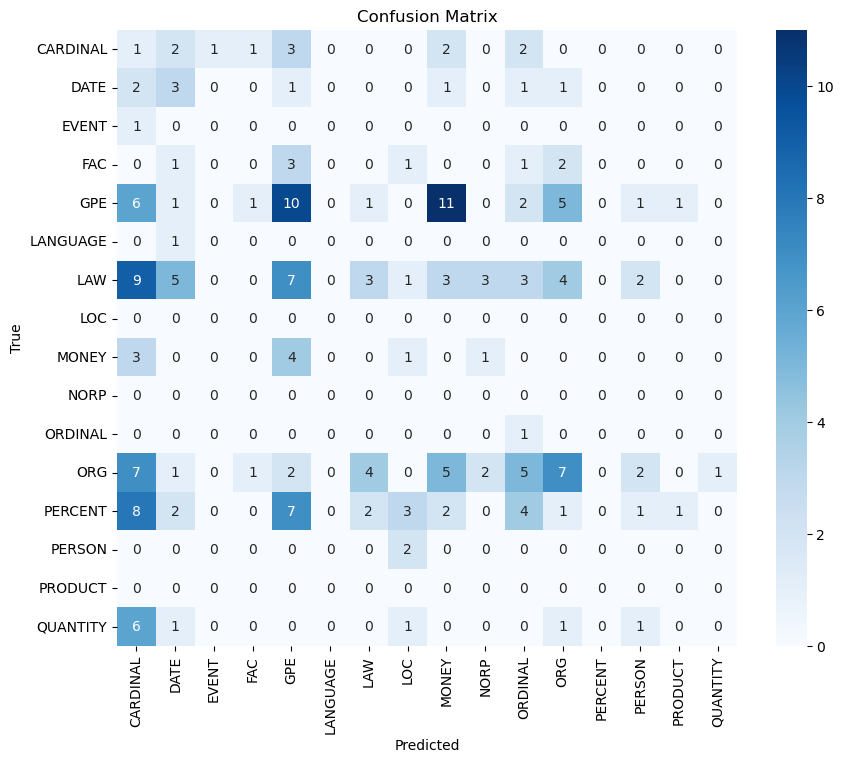

In [487]:
# Subsetting to Evaluate with Classification Reports and a Confusion matrix 

# Subsetting
hand_subset_9 = merged_hand_annotations_9[:200]
spacy_subset_9 = spacy_annotations_9[:200]

# Setting Ground Truth and Predictions
y_true_9 = [label for token, label in hand_subset_9]
y_pred_9 = [label for token, label in spacy_subset_9]

# Evaluation Reports
prec_score_micro_9 = precision_score(y_true_9, y_pred_9, average='micro')
prec_score_weighted_9 = precision_score(y_true_9, y_pred_9, average='weighted')

rec_score_micro_9 = recall_score(y_true_9, y_pred_9, average='micro')
rec_score_weighted_9 = recall_score(y_true_9, y_pred_9, average='weighted')

f1_score_micro_9 = f1_score(y_true_9, y_pred_9, average='micro')
f1_score_weighted_9 = f1_score(y_true_9, y_pred_9, average='weighted')


print("Doc 9 SDUK Penny Magazine 1833 EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS")
print()
print(f'Micro PRECISION score for subsets = {prec_score_micro_9}')
print(f'Weighted PRECISION score for subsets = {prec_score_weighted_9}')
print()
print(f'Micro RECALL score for subsets = {rec_score_micro_9}')
print(f'Weighted RECALL score for subsets = {rec_score_weighted_9}')
print()
print(f'Micro F1 score for subsets = {f1_score_micro_9}')
print(f'Weighted F1 score for subsets = {f1_score_weighted_9}')
print()

# Confusion Matrix
labels_9 = sorted(list(set(y_true_9 + y_pred_9)))
conf_matrix_9 = confusion_matrix(y_true_9, y_pred_9, labels=labels_9)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_9, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [488]:
# Evaluation Through Set Intersections and Differences 

ground_truth_set_9 = set(merged_hand_annotations_9)
spacy_predictions_set_9 = set(spacy_annotations_9)

true_positives_9 = ground_truth_set_9.intersection(spacy_predictions_set_9)

num_true_positives_9 = len(true_positives_9)
print('True Positives are when hand truth matches spacy predictions')
print(f"Number of True Positives: {num_true_positives_9}")
print()

for entity in true_positives_9:
    print(f"True Positive : {entity}")

True Positives are when hand truth matches spacy predictions
Number of True Positives: 36

True Positive : ('1822', 'DATE')
True Positive : ('39', 'CARDINAL')
True Positive : ('Minerva', 'PERSON')
True Positive : ('Sicily', 'GPE')
True Positive : ('Prometheus', 'PERSON')
True Positive : ('Balbi', 'PERSON')
True Positive : ('9', 'CARDINAL')
True Positive : ('five hundred', 'CARDINAL')
True Positive : ('France', 'GPE')
True Positive : ('Spain', 'GPE')
True Positive : ('Athenians', 'NORP')
True Positive : ('Scythia', 'GPE')
True Positive : ('Athens', 'GPE')
True Positive : ('twelve or fifteen feet', 'QUANTITY')
True Positive : ('Portugal', 'GPE')
True Positive : ('Lisbon', 'GPE')
True Positive : ('Atlas', 'PERSON')
True Positive : ('Jove', 'PERSON')
True Positive : ('Castilians', 'NORP')
True Positive : ('1828', 'DATE')
True Positive : ('Europe', 'LOC')
True Positive : ('Portuguese', 'NORP')
True Positive : ('Oporto', 'GPE')
True Positive : ('Spaniards', 'NORP')
True Positive : ('Costigan

In [489]:
false_negatives_9 = ground_truth_set_9.difference(spacy_predictions_set_9)

num_false_negatives_9 = len(false_negatives_9)
print('False Negatives are present in hand truth but not spacy predictions')
print(f"Number of False Negatives: {num_false_negatives_9}")
print()

for entity in false_negatives_9:
    print(f"False Negatives : {entity}")

False Negatives are present in hand truth but not spacy predictions
Number of False Negatives: 110

False Negatives : ('green turf', 'LOC')
False Negatives : ('Old Ocean', 'PERSON')
False Negatives : ('foals', 'PRODUCT')
False Negatives : ('musket - ball', 'PRODUCT')
False Negatives : ('Bacalhao', 'GPE')
False Negatives : ('olive crop', 'PRODUCT')
False Negatives : ('hay', 'PRODUCT')
False Negatives : ('Parthenon', 'WORK_OF_ART')
False Negatives : ('Ceres', 'PERSON')
False Negatives : ('sculptures', 'PRODUCT')
False Negatives : ('million', 'CARDINAL')
False Negatives : ('Mr . Barrow', 'PERSON')
False Negatives : ('SOUTH AFRICA', 'GPE')
False Negatives : ('wheat', 'PRODUCT')
False Negatives : ('west coast', 'LOC')
False Negatives : ('Genoa', 'GPE')
False Negatives : ('Thucydides', 'PERSON')
False Negatives : ('olives', 'PRODUCT')
False Negatives : ('sculpture', 'PRODUCT')
False Negatives : ('straits', 'LOC')
False Negatives : ('field', 'FAC')
False Negatives : ('barley', 'PRODUCT')
Fals

In [490]:
false_positives_9 = spacy_predictions_set_9.difference(ground_truth_set_9)

num_false_positives_9 = len(false_positives_9)
print('False Positives are predicted by spacy but are not in hand truth')
print(f"Number of False Positives: {num_false_positives_9}")
print()

for entity in false_positives_9:
    print(f"False Positive : {entity}")

False Positives are predicted by spacy but are not in hand truth
Number of False Positives: 99

False Positive : ('Centaurs', 'PERSON')
False Positive : ('Two', 'CARDINAL')
False Positive : ('several inches', 'QUANTITY')
False Positive : ('Museum', 'ORG')
False Positive : ('winter', 'DATE')
False Positive : ('Muses', 'ORG')
False Positive : ('1633', 'DATE')
False Positive : ('Cape', 'LOC')
False Positive : ('Nos', 'PERSON')
False Positive : ('Vulcan', 'PERSON')
False Positive : ('Leon', 'PERSON')
False Positive : ('every fifth year', 'DATE')
False Positive : ('Fates', 'GPE')
False Positive : ('about three miles', 'QUANTITY')
False Positive : ('about three feet', 'QUANTITY')
False Positive : ('525', 'CARDINAL')
False Positive : ('Hottentot', 'PERSON')
False Positive : ('January', 'DATE')
False Positive : ('Bengal', 'GPE')
False Positive : ('Jupiter', 'LOC')
False Positive : ('42', 'DATE')
False Positive : ('###############################################', 'MONEY')
False Positive : ('TH

In [491]:
rec_calc_9 = num_true_positives_9 / (num_true_positives_9 + num_false_negatives_9)
prec_calc_9 = num_true_positives_9 / (num_true_positives_9 + num_false_positives_9)
f1_calc_9 = (2 * prec_calc_9 * rec_calc_9) / (prec_calc_9 + rec_calc_9)

print(f'Evaluation Calculation Reports for Document 9 SDUK Penny Magazine 1833')
print()
print(f'Recall Score = {rec_calc_9}')
print(f'Precision Score = {prec_calc_9}')
print(f'F1 Score = {f1_calc_9}')

Evaluation Calculation Reports for Document 9 SDUK Penny Magazine 1833

Recall Score = 0.2465753424657534
Precision Score = 0.26666666666666666
F1 Score = 0.2562277580071174


## Document 10 Comparison: Clipping from SDUK Penny Magazine 1832


In [492]:
hand_annotated_data_10 = []
with open("Useful_Knowledge_Annotations_iob_3/DOCUMENT-omonroe2_illinois_edu/SDUK_PennyMag_Mar31_1832.txt.tsv", "r", encoding="utf-8") as iob_file_10:
    for line in iob_file_10:
        line = line.strip()
        if line:
            token, label = line.split("\t")
           
            hand_annotated_data_10.append((token, label))

hand_annotated_tagged_10 = [(token, label) for token, label in hand_annotated_data_10 if label != 'O']

merged_hand_annotations_10 = merge_iob_tokens(hand_annotated_tagged_10)

print(f'Hand Annotations List number = {len(merged_hand_annotations_10)}')
merged_hand_annotations_10

Hand Annotations List number = 252


[('Society for the Diffusion of Useful Knowledge', 'ORG'),
 ('MARCH 31 , 1832', 'DATE'),
 ('1673', 'DATE'),
 ('information', 'PRODUCT'),
 ('forty , fifty , or sixty miles', 'QUANTITY'),
 ('London', 'GPE'),
 ('telescope', 'PRODUCT'),
 ('two , three , or four shillings', 'MONEY'),
 ('twenty miles', 'QUANTITY'),
 ('London', 'GPE'),
 ('CHARING CROSS', 'GPE'),
 ('England', 'GPE'),
 ('Paddington', 'GPE'),
 ('Bank', 'LOC'),
 ('General Post - Office', 'LOC'),
 ('Edinburgh', 'GPE'),
 ('village', 'LOC'),
 ('London', 'GPE'),
 ('Edward', 'PERSON'),
 ('five - guinea', 'MONEY'),
 ('quarto', 'PRODUCT'),
 ('shilling', 'MONEY'),
 ('duodecimo', 'PRODUCT'),
 ('Westminster Abbey', 'GPE'),
 ('Society', 'ORG'),
 ('Charing Cross', 'GPE'),
 ('Hampstead', 'GPE'),
 ('Highgate', 'GPE'),
 ('Mews', 'LOC'),
 ('Society', 'ORG'),
 ('Hay - market', 'LOC'),
 ("St . Martin 's lane", 'GPE'),
 ('Mews', 'LOC'),
 ("St . Martin 's church", 'GPE'),
 ("St . Giles 's", 'GPE'),
 ('Holborn', 'GPE'),
 ('road', 'FAC'),
 ('the Stran

In [493]:
with open("Useful_Knowledge_Texts/Clipped_Texts/SDUK_PennyMag_Mar31_1832.txt", "r", encoding="utf-8") as text_file_10:
    text_10 = text_file_10.read()

In [494]:
doc_10 = nlp(text_10)
spacy_annotations_10 = [(ent.text, ent.label_) for ent in doc_10.ents]

print(f'Spacy Annotations List number = {len(spacy_annotations_10)}')
spacy_annotations_10

Spacy Annotations List number = 222


[('#', 'MONEY'),
 ('1', 'CARDINAL'),
 ('15', 'MONEY'),
 ('###############################################', 'MONEY'),
 ('6', 'CARDINAL'),
 ('MARCH 31, 1832', 'DATE'),
 ('1673', 'DATE'),
 ('forty', 'DATE'),
 ('fifty', 'CARDINAL'),
 ('sixty miles', 'QUANTITY'),
 ('London', 'GPE'),
 ('the present day', 'DATE'),
 ('one', 'CARDINAL'),
 ('two', 'CARDINAL'),
 ('two', 'CARDINAL'),
 ('three', 'CARDINAL'),
 ('four', 'CARDINAL'),
 ('twenty miles', 'QUANTITY'),
 ('London', 'GPE'),
 ('England', 'GPE'),
 ('thousands', 'CARDINAL'),
 ('Paddington', 'GPE'),
 ('Bank', 'ORG'),
 ('the General Post-Office to Edinburgh', 'ORG'),
 ('London', 'GPE'),
 ('one', 'CARDINAL'),
 ('two', 'CARDINAL'),
 ('the\nCharing', 'GPE'),
 ('Edward I.', 'PERSON'),
 ('Eleanor', 'PERSON'),
 ('five', 'CARDINAL'),
 ('one', 'CARDINAL'),
 ('two', 'CARDINAL'),
 ('Westminster Abbey', 'PERSON'),
 ('Penny Magazine', 'ORG'),
 ('Society', 'ORG'),
 ('Two centuries and a half ago', 'DATE'),
 ('the Diffusion of Useful Knowledge', 'ORG'),
 ('Ch

Doc 10 SDUK Penny Magazine 1832 EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS

Micro PRECISION score for subsets = 0.09
Weighted PRECISION score for subsets = 0.1415387596899225

Micro RECALL score for subsets = 0.09
Weighted RECALL score for subsets = 0.09

Micro F1 score for subsets = 0.09
Weighted F1 score for subsets = 0.09029314888010541



/Users/owenmonroe/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/owenmonroe/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


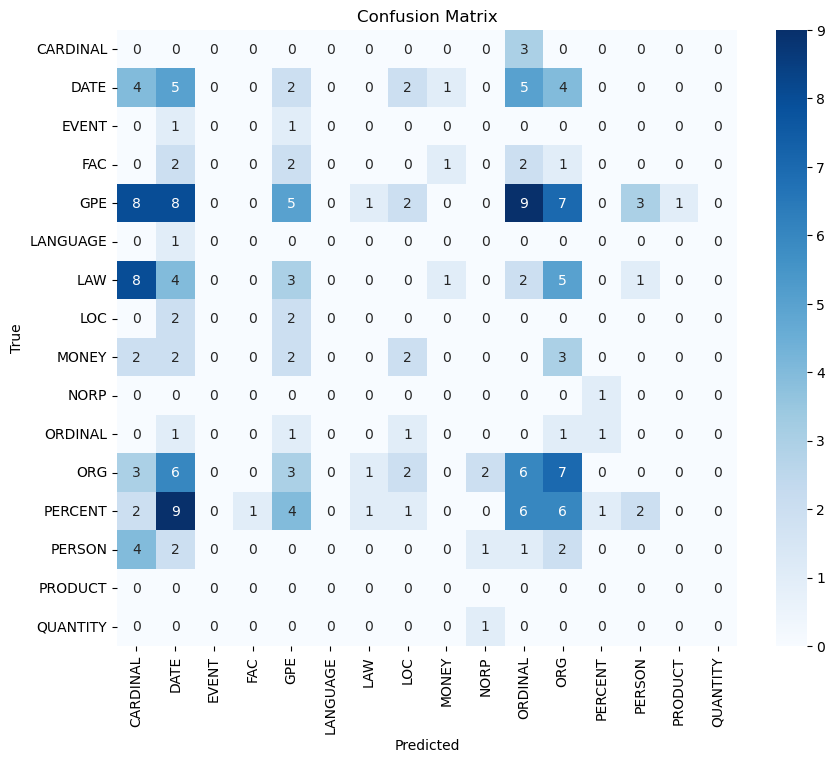

In [495]:
# Subsetting to Evaluate with Classification Reports and a Confusion matrix 

# Subsetting
hand_subset_10 = merged_hand_annotations_10[:200]
spacy_subset_10 = spacy_annotations_10[:200]

# Setting Ground Truth and Predictions
y_true_10 = [label for token, label in hand_subset_10]
y_pred_10 = [label for token, label in spacy_subset_10]

# Evaluation Reports
prec_score_micro_10 = precision_score(y_true_10, y_pred_10, average='micro')
prec_score_weighted_10 = precision_score(y_true_10, y_pred_10, average='weighted')

rec_score_micro_10 = recall_score(y_true_10, y_pred_10, average='micro')
rec_score_weighted_10 = recall_score(y_true_10, y_pred_10, average='weighted')

f1_score_micro_10 = f1_score(y_true_10, y_pred_10, average='micro')
f1_score_weighted_10 = f1_score(y_true_10, y_pred_10, average='weighted')


print("Doc 10 SDUK Penny Magazine 1832 EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS")
print()
print(f'Micro PRECISION score for subsets = {prec_score_micro_10}')
print(f'Weighted PRECISION score for subsets = {prec_score_weighted_10}')
print()
print(f'Micro RECALL score for subsets = {rec_score_micro_10}')
print(f'Weighted RECALL score for subsets = {rec_score_weighted_10}')
print()
print(f'Micro F1 score for subsets = {f1_score_micro_10}')
print(f'Weighted F1 score for subsets = {f1_score_weighted_10}')
print()

# Confusion Matrix
labels_10 = sorted(list(set(y_true_10 + y_pred_10)))
conf_matrix_10 = confusion_matrix(y_true_10, y_pred_10, labels=labels_10)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_10, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [496]:
# Evaluation Through Set Intersections and Differences 

ground_truth_set_10 = set(merged_hand_annotations_10)
spacy_predictions_set_10 = set(spacy_annotations_10)

true_positives_10 = ground_truth_set_10.intersection(spacy_predictions_set_10)

num_true_positives_10 = len(true_positives_10)
print('True Positives are when hand truth matches spacy predictions')
print(f"Number of True Positives: {num_true_positives_10}")
print()

for entity in true_positives_10:
    print(f"True Positive : {entity}")

True Positives are when hand truth matches spacy predictions
Number of True Positives: 43

True Positive : ('England', 'GPE')
True Positive : ('Tasman', 'PERSON')
True Positive : ('Wales', 'GPE')
True Positive : ('Society', 'ORG')
True Positive : ('Anthony Van Diemen', 'PERSON')
True Positive : ('MARCH 81', 'DATE')
True Positive : ('46,727 acres', 'QUANTITY')
True Positive : ('Henry VI', 'PERSON')
True Positive : ('1813', 'DATE')
True Positive : ('London', 'GPE')
True Positive : ('Netherlands', 'GPE')
True Positive : ('Hobart', 'PERSON')
True Positive : ('hundred', 'CARDINAL')
True Positive : ('Le Seur', 'PERSON')
True Positive : ('Calendar', 'PRODUCT')
True Positive : ('1829', 'DATE')
True Positive : ('John River', 'PERSON')
True Positive : ('Henry VIII', 'PERSON')
True Positive : ('1557', 'DATE')
True Positive : ('September 1830', 'DATE')
True Positive : ('1810', 'DATE')
True Positive : ('an hour', 'TIME')
True Positive : ('twenty miles', 'QUANTITY')
True Positive : ('India', 'GPE')


In [497]:
false_negatives_10 = ground_truth_set_10.difference(spacy_predictions_set_10)

num_false_negatives_10 = len(false_negatives_10)
print('False Negatives are present in hand truth but not spacy predictions')
print(f"Number of False Negatives: {num_false_negatives_10}")
print()

for entity in false_negatives_10:
    print(f"False Negatives : {entity}")

False Negatives are present in hand truth but not spacy predictions
Number of False Negatives: 144

False Negatives : ('the Strand', 'GPE')
False Negatives : ('island', 'LOC')
False Negatives : ('in', 'PRODUCT')
False Negatives : ('Bank', 'LOC')
False Negatives : ("St . Giles 's", 'GPE')
False Negatives : ('Hay - market', 'LOC')
False Negatives : ('One hundred lashes', 'QUANTITY')
False Negatives : ('sheep', 'PRODUCT')
False Negatives : ('Hobart Town Gazette', 'WORK_OF_ART')
False Negatives : ('saloon', 'FAC')
False Negatives : ("St . David 's church", 'FAC')
False Negatives : ('ale', 'PRODUCT')
False Negatives : ('Almanac', 'PRODUCT')
False Negatives : ('Charing Cross', 'GPE')
False Negatives : ('country', 'LOC')
False Negatives : ('fifty lashes', 'QUANTITY')
False Negatives : ('capital', 'LOC')
False Negatives : ('the Norman Conquest', 'EVENT')
False Negatives : ('fourteenth century', 'DATE')
False Negatives : ('barley', 'PRODUCT')
False Negatives : ('beer', 'PRODUCT')
False Negative

In [498]:
false_positives_10 = spacy_predictions_set_10.difference(ground_truth_set_9)

num_false_positives_10 = len(false_positives_10)
print('False Positives are predicted by spacy but are not in hand truth')
print(f"Number of False Positives: {num_false_positives_10}")
print()

for entity in false_positives_10:
    print(f"False Positive : {entity}")

False Positives are predicted by spacy but are not in hand truth
Number of False Positives: 165

False Positive : ('the fifih year of Ed-', 'DATE')
False Positive : ('Tasman', 'PERSON')
False Positive : ('Wales', 'GPE')
False Positive : ('Martin', 'ORG')
False Positive : ("the Van Diemen's", 'PERSON')
False Positive : ('five', 'CARDINAL')
False Positive : ('One hundred', 'CARDINAL')
False Positive : ('Netherlands', 'GPE')
False Positive : ('Arthur', 'PERSON')
False Positive : ('December, 1825', 'DATE')
False Positive : ('1829', 'DATE')
False Positive : ('centuries', 'DATE')
False Positive : ('29th', 'ORDINAL')
False Positive : ('John River', 'PERSON')
False Positive : ('stamp- year', 'DATE')
False Positive : ('1557', 'DATE')
False Positive : ('the Legislative Council\n', 'ORG')
False Positive : ('some Charing Cross', 'ORG')
False Positive : ('an hour', 'TIME')
False Positive : ('1633', 'DATE')
False Positive : ('1831', 'DATE')
False Positive : ('Penny Magazine', 'ORG')
False Positive :

In [499]:
rec_calc_10 = num_true_positives_10 / (num_true_positives_10 + num_false_negatives_10)
prec_calc_10 = num_true_positives_10 / (num_true_positives_10 + num_false_positives_10)
f1_calc_10 = (2 * prec_calc_10 * rec_calc_10) / (prec_calc_10 + rec_calc_10)

print(f'Evaluation Calculation Reports for Document 10 SDUK Penny Magazine 1832')
print()
print(f'Recall Score = {rec_calc_10}')
print(f'Precision Score = {prec_calc_10}')
print(f'F1 Score = {f1_calc_10}')

Evaluation Calculation Reports for Document 10 SDUK Penny Magazine 1832

Recall Score = 0.22994652406417113
Precision Score = 0.20673076923076922
F1 Score = 0.2177215189873418


## Final Evaluations and Calculations Across Documents
Precision, Recall, F1, Tags, Confusion Matrix


In [508]:
total_avg_rec_score = (rec_calc + rec_calc_2 + rec_calc_3 + rec_calc_4 + rec_calc_5 + rec_calc_6 + rec_calc_7 + rec_calc_8 + rec_calc_9 + rec_calc_10) / 10
total_avg_prec_score = (prec_calc + prec_calc_2 + prec_calc_3 + prec_calc_4 + prec_calc_5 + prec_calc_6 + prec_calc_7 + prec_calc_8 + prec_calc_9 + prec_calc_10) / 10
total_avg_f1_score = (f1_calc + f1_calc_2 + f1_calc_3 + f1_calc_5 + f1_calc_6 + f1_calc_7 + f1_calc_8 + f1_calc_9 + f1_calc_10) / 9


Total_Hand_Tags = len(merged_hand_annotations_1) + len(merged_hand_annotations_2) + len(merged_hand_annotations_3) + len(merged_hand_annotations_4) + len(merged_hand_annotations_5) + len(merged_hand_annotations_6) + len(merged_hand_annotations_7) + len(merged_hand_annotations_8) + len(merged_hand_annotations_9) +  len(merged_hand_annotations_10)

Total_Spacy_Tags = len(spacy_annotations) + len(spacy_annotations_2) + len(spacy_annotations_3) + len(spacy_annotations_4) + len(spacy_annotations_5) + len(spacy_annotations_6) + len(spacy_annotations_7) + len(spacy_annotations_8) + len(spacy_annotations_9) + len(spacy_annotations_10)

print

print('Average Evaluation Reports Across All 10 Documents using the Spacy Model')
print()
print(f'Average Recall Score Across the 10 Documents = {total_avg_rec_score}')
print(f'Average Precision Score Across the 10 Documents = {total_avg_prec_score}')
print(f'Average F1 Score Across 9 Documents = {total_avg_f1_score} , Document 4 have no true positive and so no F1 Score')
print()
print(f'I made a total of {Total_Hand_Tags} Annotations and the Spacy Model made a total of {Total_Spacy_Tags} Annotations across all subsets for all 10 Document.')
#print(f'Only the annotation {true_positives} for Document 1 Matched.')

Average Evaluation Reports Across All 10 Documents using the Spacy Model

Average Recall Score Across the 10 Documents = 0.20476958126007952
Average Precision Score Across the 10 Documents = 0.20197471008712414
Average F1 Score Across 9 Documents = 0.20597712345551542 , Document 4 have no true positive and so no F1 Score

I made a total of 1777 Annotations and the Spacy Model made a total of 1855 Annotations across all subsets for all 10 Document.


In [501]:
combined_tp= true_positives.union(true_positives_2).union(true_positives_3).union(true_positives_4).union(true_positives_5).union(true_positives_6).union(true_positives_7).union(true_positives_8).union(true_positives_9).union(true_positives_10)

tag_lists = {}

# Organize tuples into separate lists based on tags
for token, tag in combined_tp:
    if tag not in tag_lists:
        tag_lists[tag] = [(token, tag)]
    else:
        tag_lists[tag].append((token, tag))

# Convert the dictionaries to lists
lists_by_tag = list(tag_lists.values())

print('Total True Positives by Tag Across all 10 Documents')
# Print the lists organized by tag
for tag_list in lists_by_tag:
    print(f"{tag_list[0][1]}, {len(tag_list)} Total : ", tag_list)

Total True Positives by Tag Across all 10 Documents
PERSON, 72 Total :  [('Marie Therese', 'PERSON'), ('Tasman', 'PERSON'), ('Jane', 'PERSON'), ('Fitzjames', 'PERSON'), ('Minerva', 'PERSON'), ('Charles', 'PERSON'), ('John River', 'PERSON'), ('Tabitha', 'PERSON'), ('Thomas Digges', 'PERSON'), ('Pallet', 'PERSON'), ('Dupin', 'PERSON'), ('Louis XVU', 'PERSON'), ('Louis Philip', 'PERSON'), ('Miriam', 'PERSON'), ('Louis XVIIL', 'PERSON'), ('Anthony Van Diemen', 'PERSON'), ('John', 'PERSON'), ('Balbi', 'PERSON'), ('LoiHs XIV', 'PERSON'), ('EVANS', 'PERSON'), ('Robert', 'PERSON'), ('Eugeniuses', 'PERSON'), ('Johnson', 'PERSON'), ('Charles VIIL', 'PERSON'), ('Gulliver', 'PERSON'), ('Henry III', 'PERSON'), ('Charles VI', 'PERSON'), ('Charles VIL', 'PERSON'), ('Hannah', 'PERSON'), ('Cherry', 'PERSON'), ('Surry', 'PERSON'), ('Louis VIII', 'PERSON'), ('Herbert', 'PERSON'), ('Prometheus', 'PERSON'), ('Fox Talbot', 'PERSON'), ('Smollett', 'PERSON'), ('Dryden', 'PERSON'), ('Miss Monitor', 'PERSON'), 

In [502]:
combined_fn= false_negatives.union(false_negatives_2).union(false_negatives_3).union(false_negatives_4).union(false_negatives_5).union(false_negatives_6).union(false_negatives_7).union(false_negatives_8).union(false_negatives_9).union(false_negatives_10)

tag_lists = {}

# Organize tuples into separate lists based on tags
for token, tag in combined_fn:
    if tag not in tag_lists:
        tag_lists[tag] = [(token, tag)]
    else:
        tag_lists[tag].append((token, tag))

# Convert the dictionaries to lists
lists_by_tag = list(tag_lists.values())

print('Total False Negatives by Tag Across all 10 Documents')
print('False Negatives are present in hand truth but not spacy predictions')
print()
# Print the lists organized by tag
for tag_list in lists_by_tag:
    print(f"{tag_list[0][1]}, {len(tag_list)} Total : ", tag_list)

Total False Negatives by Tag Across all 10 Documents
False Negatives are present in hand truth but not spacy predictions

MONEY, 32 Total :  [('l , 037 , iO 4,4 » l francs', 'MONEY'), ('some', 'MONEY'), ('277,486,000', 'MONEY'), ('37.532,061,470 francs', 'MONEY'), ('few', 'MONEY'), ('shilling', 'MONEY'), ('38,000,000 francs', 'MONEY'), ('five - guinea', 'MONEY'), ('103,050,000', 'MONEY'), ('millions of pounds', 'MONEY'), ('80 millions sterling', 'MONEY'), ('1,035,415,552 franos', 'MONEY'), ('two , three , or four shillings', 'MONEY'), ('800,000,000 of fianos', 'MONEY'), ('1,200 millions sterling', 'MONEY'), ("3,334,005 , . ' > 15", 'MONEY'), ('300,00 ( » , 000 francs', 'MONEY'), ('gratis', 'MONEY'), ('HALFPENSE', 'MONEY'), ('45,500 , ( HIO francs', 'MONEY'), ('hundred', 'MONEY'), ('11 d', 'MONEY'), ('guineas', 'MONEY'), ('$ 100', 'MONEY'), ('50,000,000', 'MONEY'), ('4 , ( > 78,70 R , 805 francs', 'MONEY'), ('silver', 'MONEY'), ("337,0 tW , ' i 00 francs", 'MONEY'), ('THREE', 'MONEY'), 

In [503]:
combined_fp= false_positives.union(false_positives_2).union(false_positives_3).union(false_positives_4).union(false_positives_5).union(false_positives_6).union(false_positives_7).union(false_positives_8).union(false_positives_9).union(false_positives_10)

tag_lists = {}

# Organize tuples into separate lists based on tags
for token, tag in combined_fp:
    if tag not in tag_lists:
        tag_lists[tag] = [(token, tag)]
    else:
        tag_lists[tag].append((token, tag))

# Convert the dictionaries to lists
lists_by_tag = list(tag_lists.values())

print('Total False Positives by Tag Across all 10 Documents')
print('False Positives are predicted by spacy but are not in hand truth')
print()
# Print the lists organized by tag
for tag_list in lists_by_tag:
    print(f"{tag_list[0][1]}, {len(tag_list)} Total : ", tag_list)

Total False Positives by Tag Across all 10 Documents
False Positives are predicted by spacy but are not in hand truth

PERSON, 212 Total :  [('Charles IX.', 'PERSON'), ('C. Cromie', 'PERSON'), ('H. R. Hearn', 'PERSON'), ('Wynter', 'PERSON'), ('J. G. Purdon', 'PERSON'), ('Ist Rabiu II', 'PERSON'), ('Loch Katrine', 'PERSON'), ('George Jamieson’s', 'PERSON'), ('Clint', 'PERSON'), ('Carew', 'PERSON'), ('Marne', 'PERSON'), ('Vulcan', 'PERSON'), ('Hottentot', 'PERSON'), ('N. A. Siebs', 'PERSON'), ('Esq', 'PERSON'), ('Charles I.', 'PERSON'), ('M. Dupin', 'PERSON'), ('J. W. Stevenson', 'PERSON'), ('Carl Jantzen', 'PERSON'), ('Philip', 'PERSON'), ('Louis IX', 'PERSON'), ('Mayall', 'PERSON'), ('W. A. P. Martin', 'PERSON'), ('Miss Edgeworth', 'PERSON'), ('Tlie \n ', 'PERSON'), ('Holborn', 'PERSON'), ('Eleanor', 'PERSON'), ("Miss Monitor's", 'PERSON'), ('Charles X.', 'PERSON'), ('Zedler', 'PERSON'), ('Sweet', 'PERSON'), ('Cambray', 'PERSON'), ('Gil Morrice', 'PERSON'), ('Louis Antoine', 'PERSON'),

In [510]:
num_true_positives_total = len(combined_tp)
num_false_negatives_total = len(combined_fn)
num_false_positives_total = len(combined_fp)

rec_calc_total = num_true_positives_total / (num_true_positives_total + num_false_negatives_total)
prec_calc_total = num_true_positives_total / (num_true_positives_total + num_false_positives_total)
f1_calc_total = (2 * prec_calc_total * rec_calc_total) / (prec_calc_total + rec_calc_total)

print(f'Evaluation Calculation Reports for All 10 Documents')
print()
print(f'Total True Positives = {num_true_positives_total}')
print(f'Total False Negatives = {num_false_negatives_total}')
print(f'Total False Positives = {num_false_positives_total}')
print()
print(f'Total Recall Score = {rec_calc_total}')
print(f'Total Precision Score = {prec_calc_total}')
print(f'Total F1 Score = {f1_calc_total}')

Evaluation Calculation Reports for All 10 Documents

Total True Positives = 275
Total False Negatives = 1062
Total False Positives = 938

Total Recall Score = 0.2056843679880329
Total Precision Score = 0.2267106347897774
Total F1 Score = 0.21568627450980393


In [505]:
# Creating Confusion Matrix Across All 10 Documents (within created subsets)

y_true_all = y_true + y_true_2 + y_true_3 + y_true_4 + y_true_5 + y_true_6 + y_true_7 + y_true_8 + y_true_9 + y_true_10
y_pred_all =  y_pred + y_pred_2 + y_pred_3 + y_pred_4 + y_pred_5 + y_pred_6 + y_pred_7 + y_pred_8 + y_pred_9 + y_pred_10


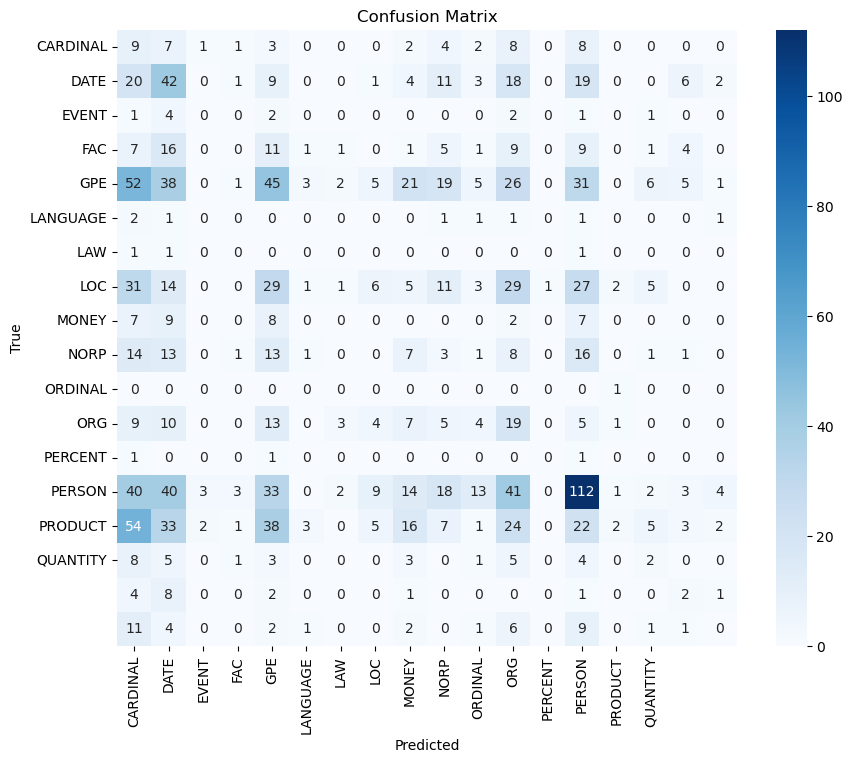

In [506]:
labels_all = sorted(list(set(y_true_all + y_pred_all)))
conf_matrix_all = confusion_matrix(y_true_all, y_pred_all, labels=labels_all)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_all, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()